# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2021
## Домашнее задание 1. Cвойства оценок
### Дедлайн --- 8 октября 9:00

Это первое обязательное домашнее задание нашего курса. Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook (colab):

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов.

## Важно

Перед отправкой проверьте, что весь ваш код выполняется без ошибок, если во время проверки после последовательного перезапуска ячеек что-то пойдет не так, то задание может быть оценено в 0 баллов.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns

sns.set(style='darkgrid', font_scale=1.4)
%matplotlib inline
%config InlineBackend.figure_format="retina"  # only for retina display

In [ ]:
from typing import List, Tuple, Dict, Optional

Зафиксируем `seed` для воспроизводимости.

In [ ]:
np.random.seed(42)

### Задача 1

Сгенерируйте выборку $X_1, \dots, X_N$ из равномерного распределения на отрезке $[0, \theta]$ для $N = 10^4$.

In [ ]:
N = 10000  # use this
THETA = 5
sample = sps.uniform.rvs(loc=0, scale=THETA, size=N)

Для всех $n \leqslant N$ посчитайте оценки параметра $\theta$ из теоретической задачи: $2\overline{X}, \; \overline{X} + X_{(n)}/ 2, \; (n+1)X_{(1)}, \; X_{(1)}+X_{(n)}, \; \frac{n+1}{n} X_{(n)}$. Используйте векторные операции.

__Подсказка:__ Могут быть полезными функции `np.arange`, `np.cumsum`, `np.maximum.accumulate` и `np.minimum.accumulate`

In [ ]:
ID_TO_ESTIMATION_NAME = {
    0: r'$2\overline{X}$',
    1: r'$\overline{X} + X_{(n)} / 2$',
    2: r'$(n+1)X_{(1)}$',
    3: r'$X_{(1)}+X_{(n)}$',
    4: r'$\frac{n+1}{n} X_{(n)}$',
}

In [ ]:
def get_estimation_array(sample: np.array) -> List[np.array]:
  estim_1 = sample.cumsum() * 2 / (np.arange(N) + 1)
  estim_2 = estim_1 / 2 + np.maximum.accumulate(sample) / 2
  estim_3 = np.minimum.accumulate(sample) * (np.arange(N) + 2)
  estim_4 = np.minimum.accumulate(sample) + np.maximum.accumulate(sample)
  estim_5 = np.maximum.accumulate(sample) * ((np.arange(N) + 2) / (np.arange(N) + 1))
  return [estim_1, estim_2, estim_3, estim_4, estim_5]

Постройте на одном графике разными цветами для всех оценок функции модуля разности оценки и истинного значения $\theta$ в зависимости от $n$. Если некоторые оценки (при фиксированном значении $n$) сильно отличаются от истинного значения параметра $\theta$, то исключите их и постройте еще один график со всеми кривыми (для измененного значения $\theta$). Для избавления от больших значений разности в начале ограничьте масштаб графика. Для наглядности точки лучше соединить линиями.

Не забудьте подписать оси, а также добавить легенду к графику.

In [ ]:
sns.set(style="darkgrid", font_scale=1.4)

In [ ]:
def draw_uniform_estimations_by_sample(
    sample: np.array,
    theta: np.float64 = THETA,
    estimation_mask: List[bool] = [True] * len(sample),
    y_max: float = None,
    ):
    theta_array = np.zeros(N) + theta
    estimation_array = get_estimation_array(sample)
    grid = np.arange(N)
    fig, axis = plt.subplots()
    fig.set_size_inches(15, 8)
    
    axis.set_title(
        r'Модуль разности реального значения параметра $\theta$ и его оценки ' +
        r'в зависимости от размера выборки ' +
        r'($\theta$ = {})'.format(theta),
        fontsize = 20
    )
    
    axis.set_xlabel('Размер выборки', fontsize=15)
    axis.set_ylabel('Модуль разности оценки и реального значения', fontsize=12)
    if y_max is not None:
      axis.set_ylim(0, y_max)

    
    for i, estim in enumerate(estimation_array):
      if estimation_mask[i]:
          axis.plot(
              grid, 
              np.absolute(estim - theta_array),
              label=r'Оценка {}'.format(ID_TO_ESTIMATION_NAME[i])
          )

    axis.legend()
    plt.show()
    return 

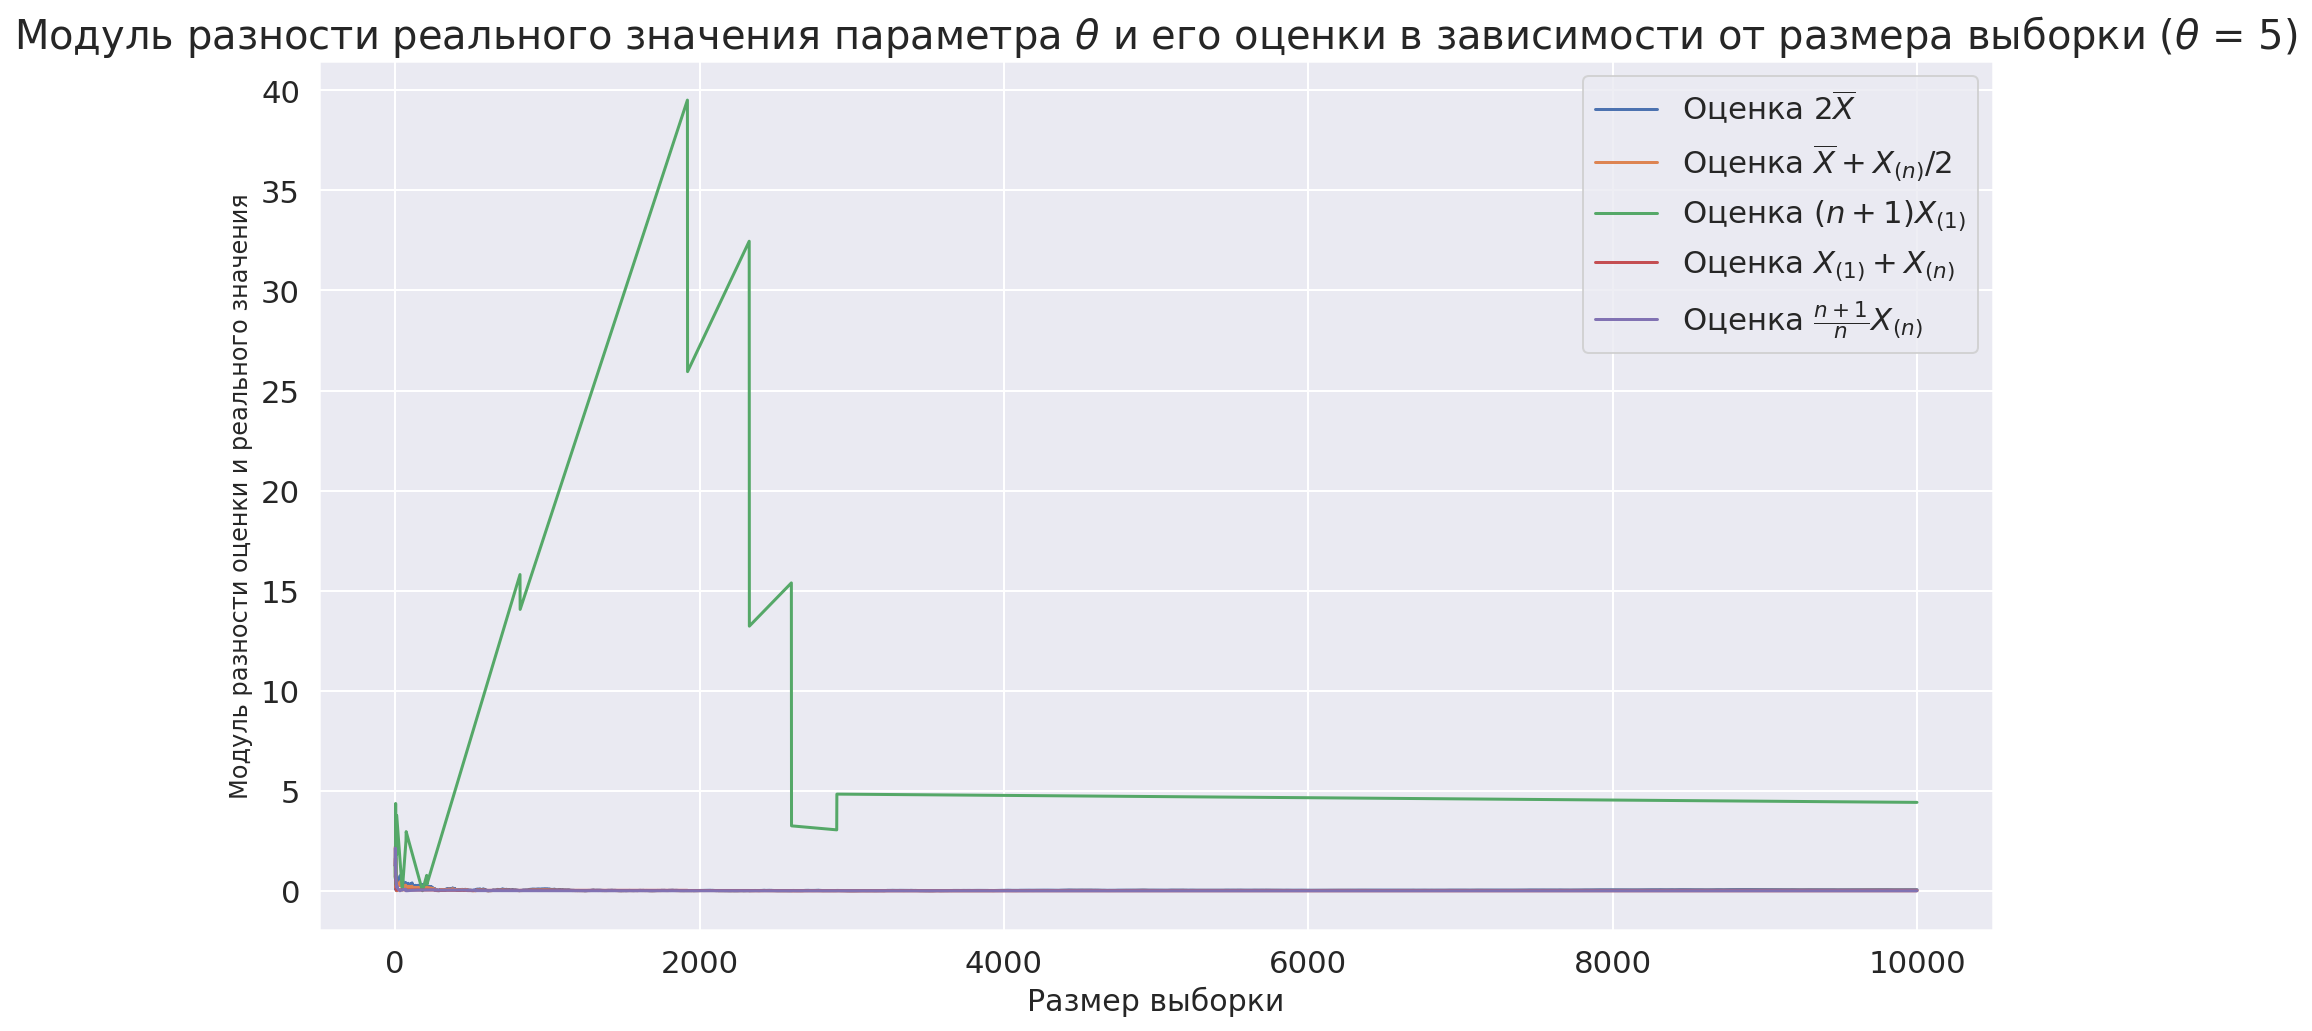

In [ ]:
draw_uniform_estimations_by_sample(sample)

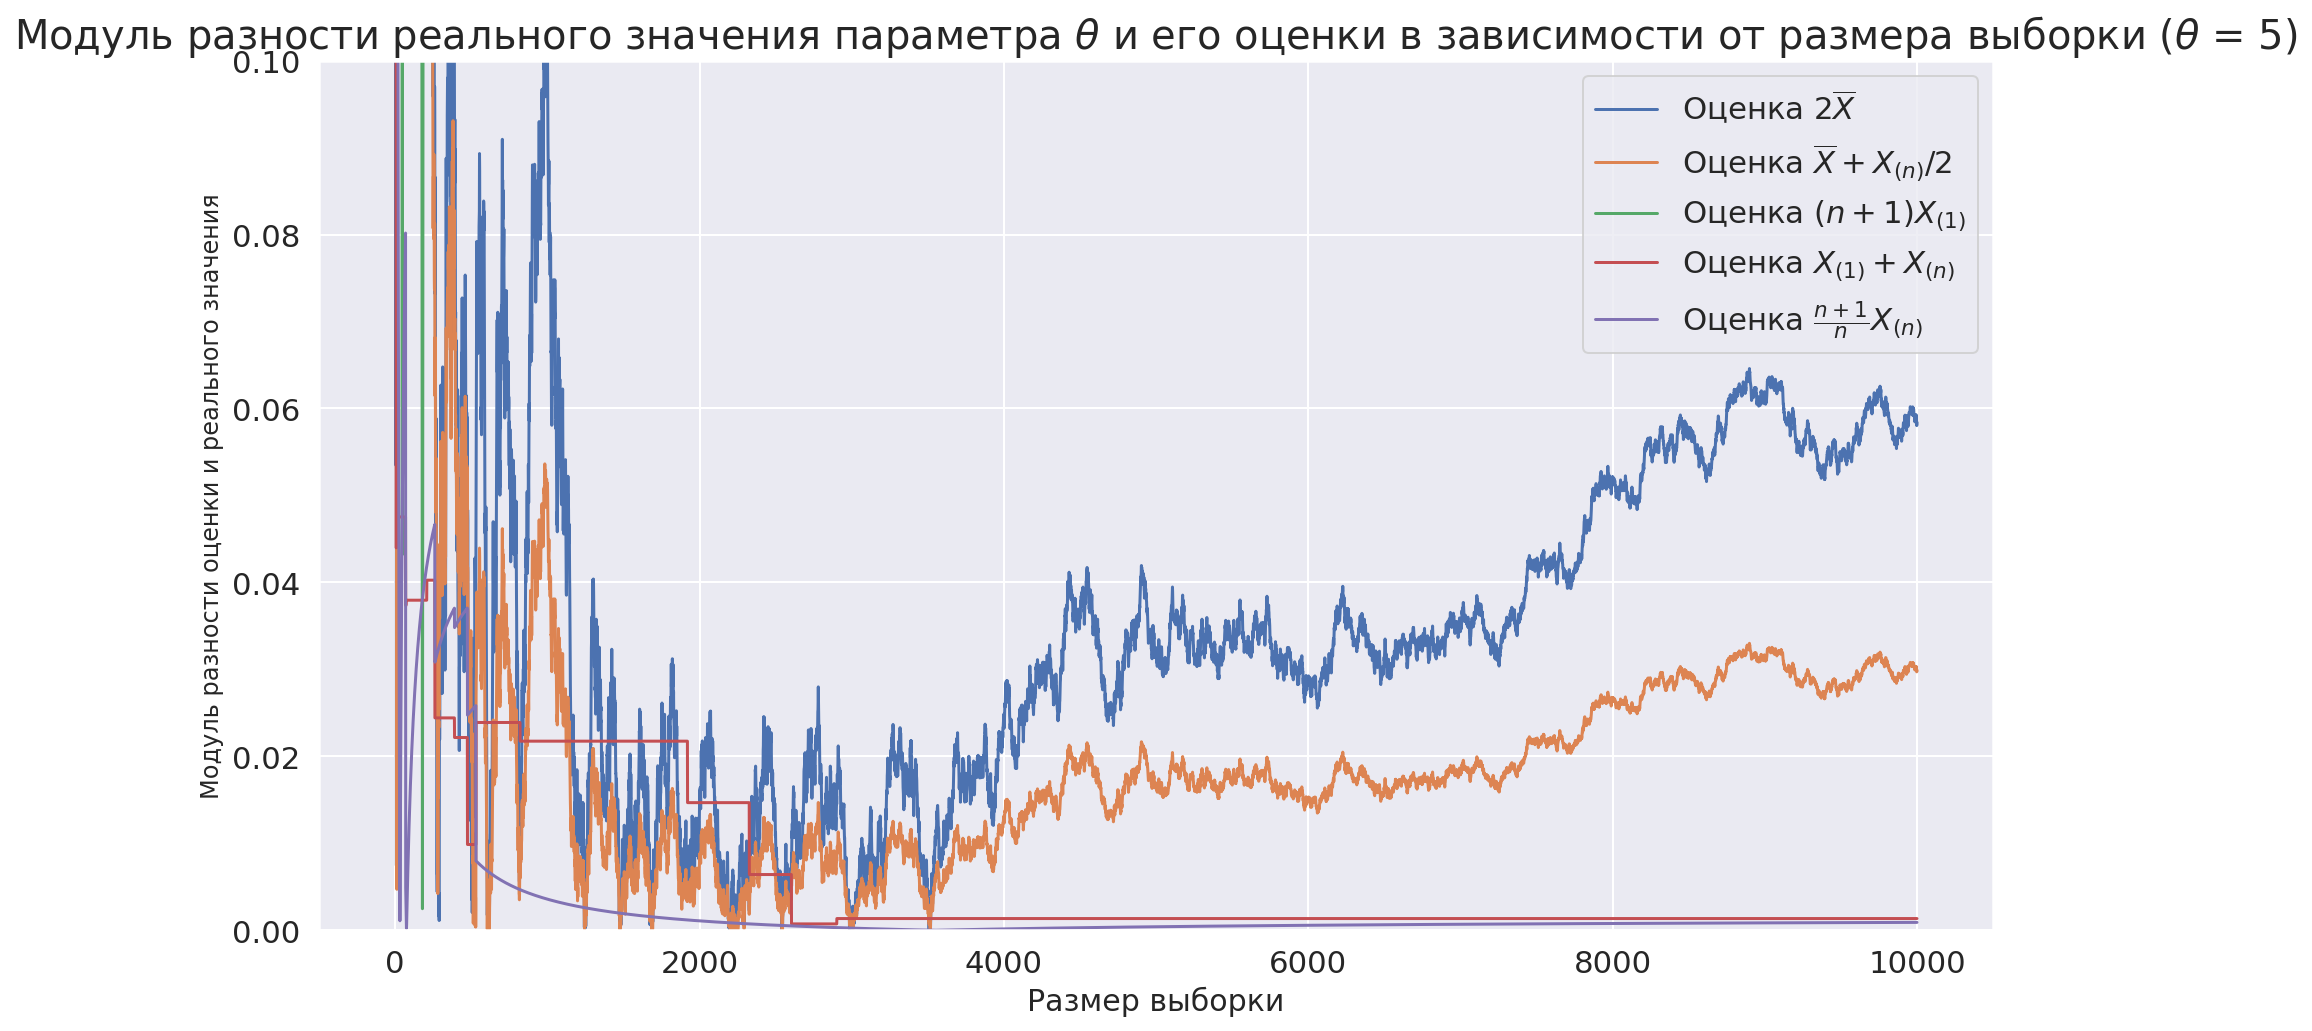

In [ ]:
draw_uniform_estimations_by_sample(sample, y_max=0.1)

Какая оценка получилась лучше (в смысле упомянутого модуля разности при $n = N$)?

__Ответ:__ 
Как видно из графиков, если рассматривать модуль разности реального значения параметра и того значения, которое дает оценка, при каждом `n`, то наилучшими являются оценки $X_{(1)}+X_{(n)}$ и $\frac{n+1}{n} X_{(n)}$


Проведите эксперимент для разных значений $\theta$ (количество графиков равно количеству значений $\theta$)

Начертим три графика для $\theta \in \{7, 12, 19\}$

In [ ]:
THETA_VALUES = [7, 12, 19]

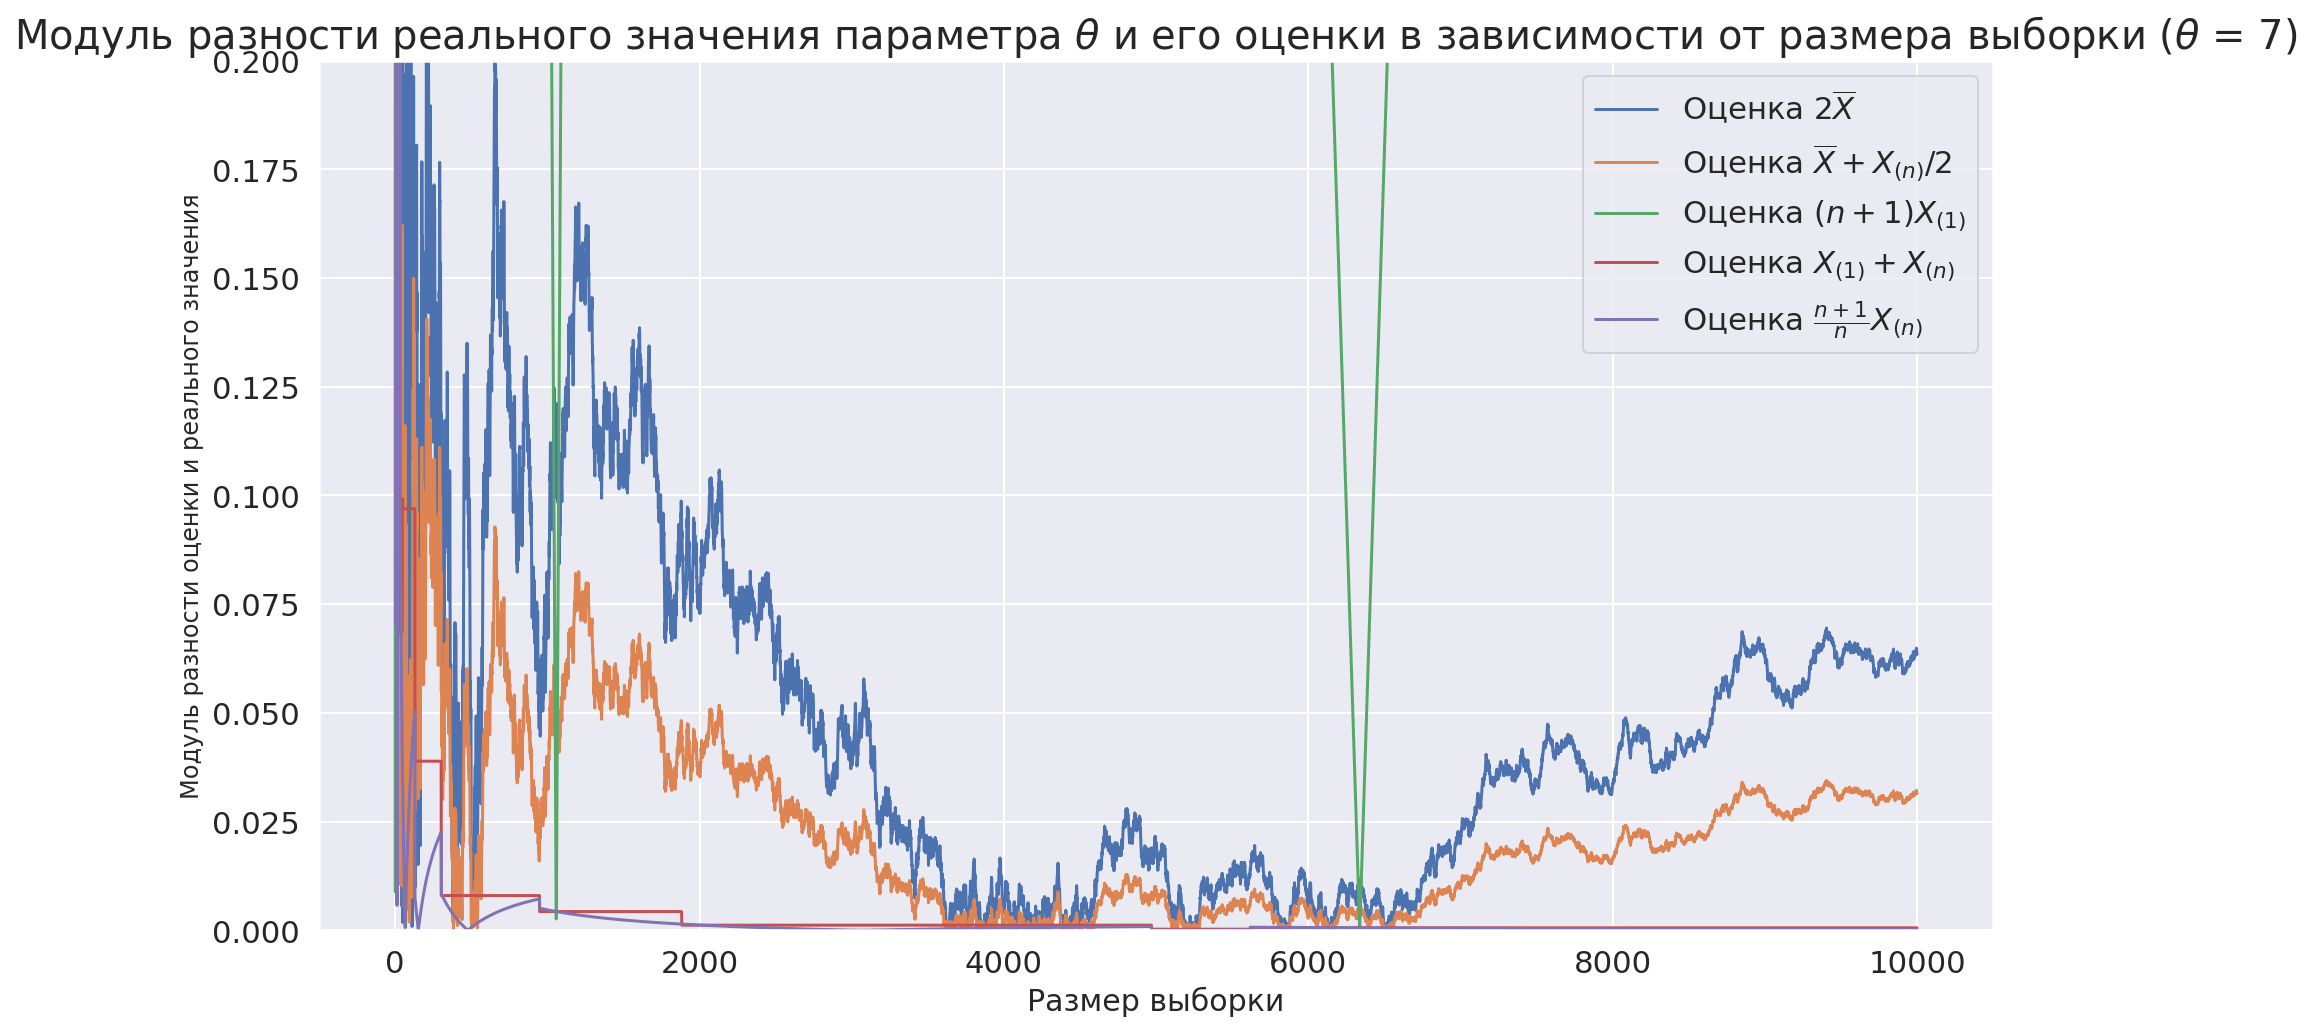

In [ ]:
draw_uniform_estimations_by_sample(
    sps.uniform.rvs(loc=0, scale=THETA_VALUES[0], size=N),
    THETA_VALUES[0],
    y_max=0.2)

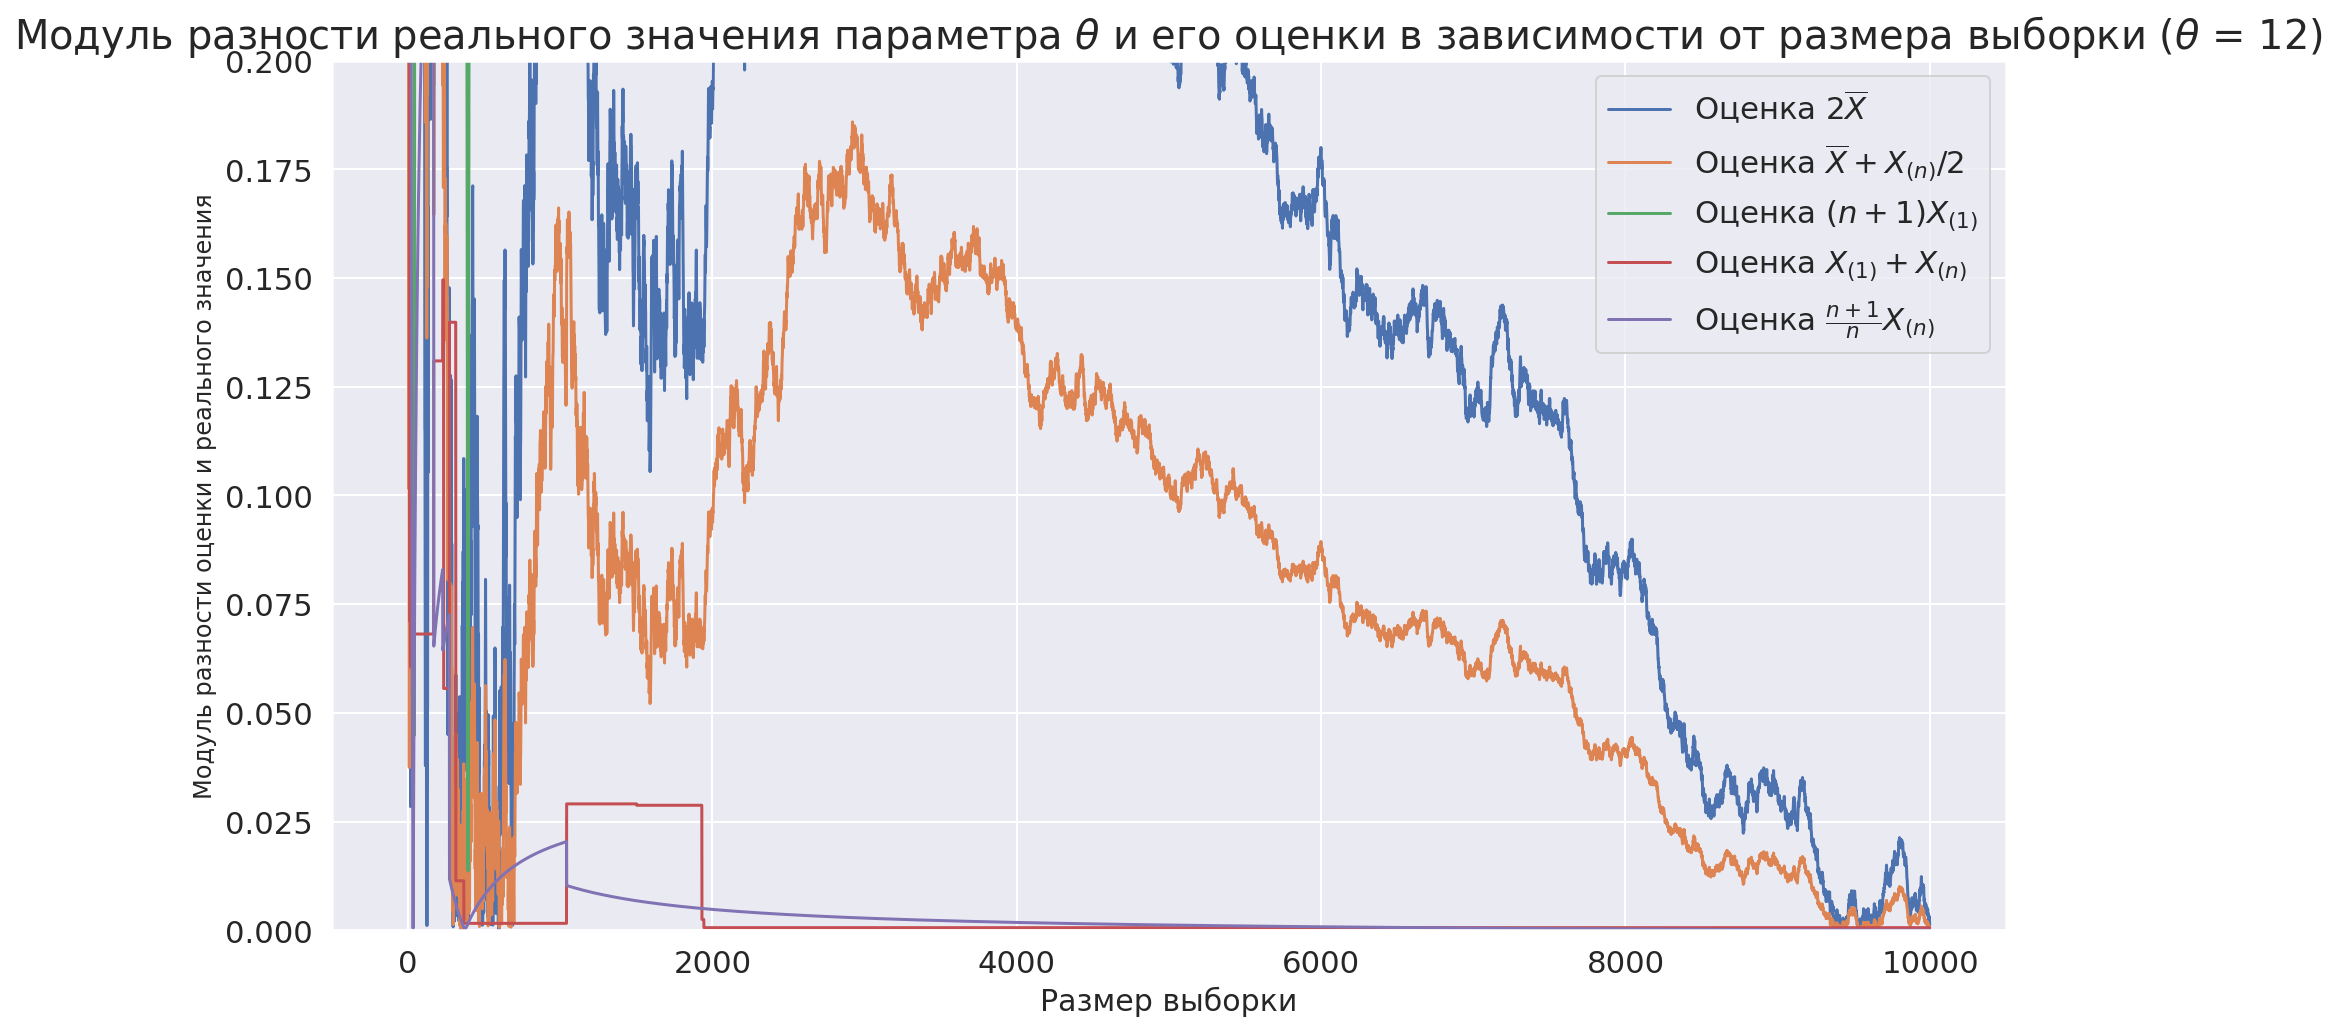

In [ ]:
draw_uniform_estimations_by_sample(
    sps.uniform.rvs(loc=0, scale=THETA_VALUES[1], size=N),
    THETA_VALUES[1],
    y_max=0.2)

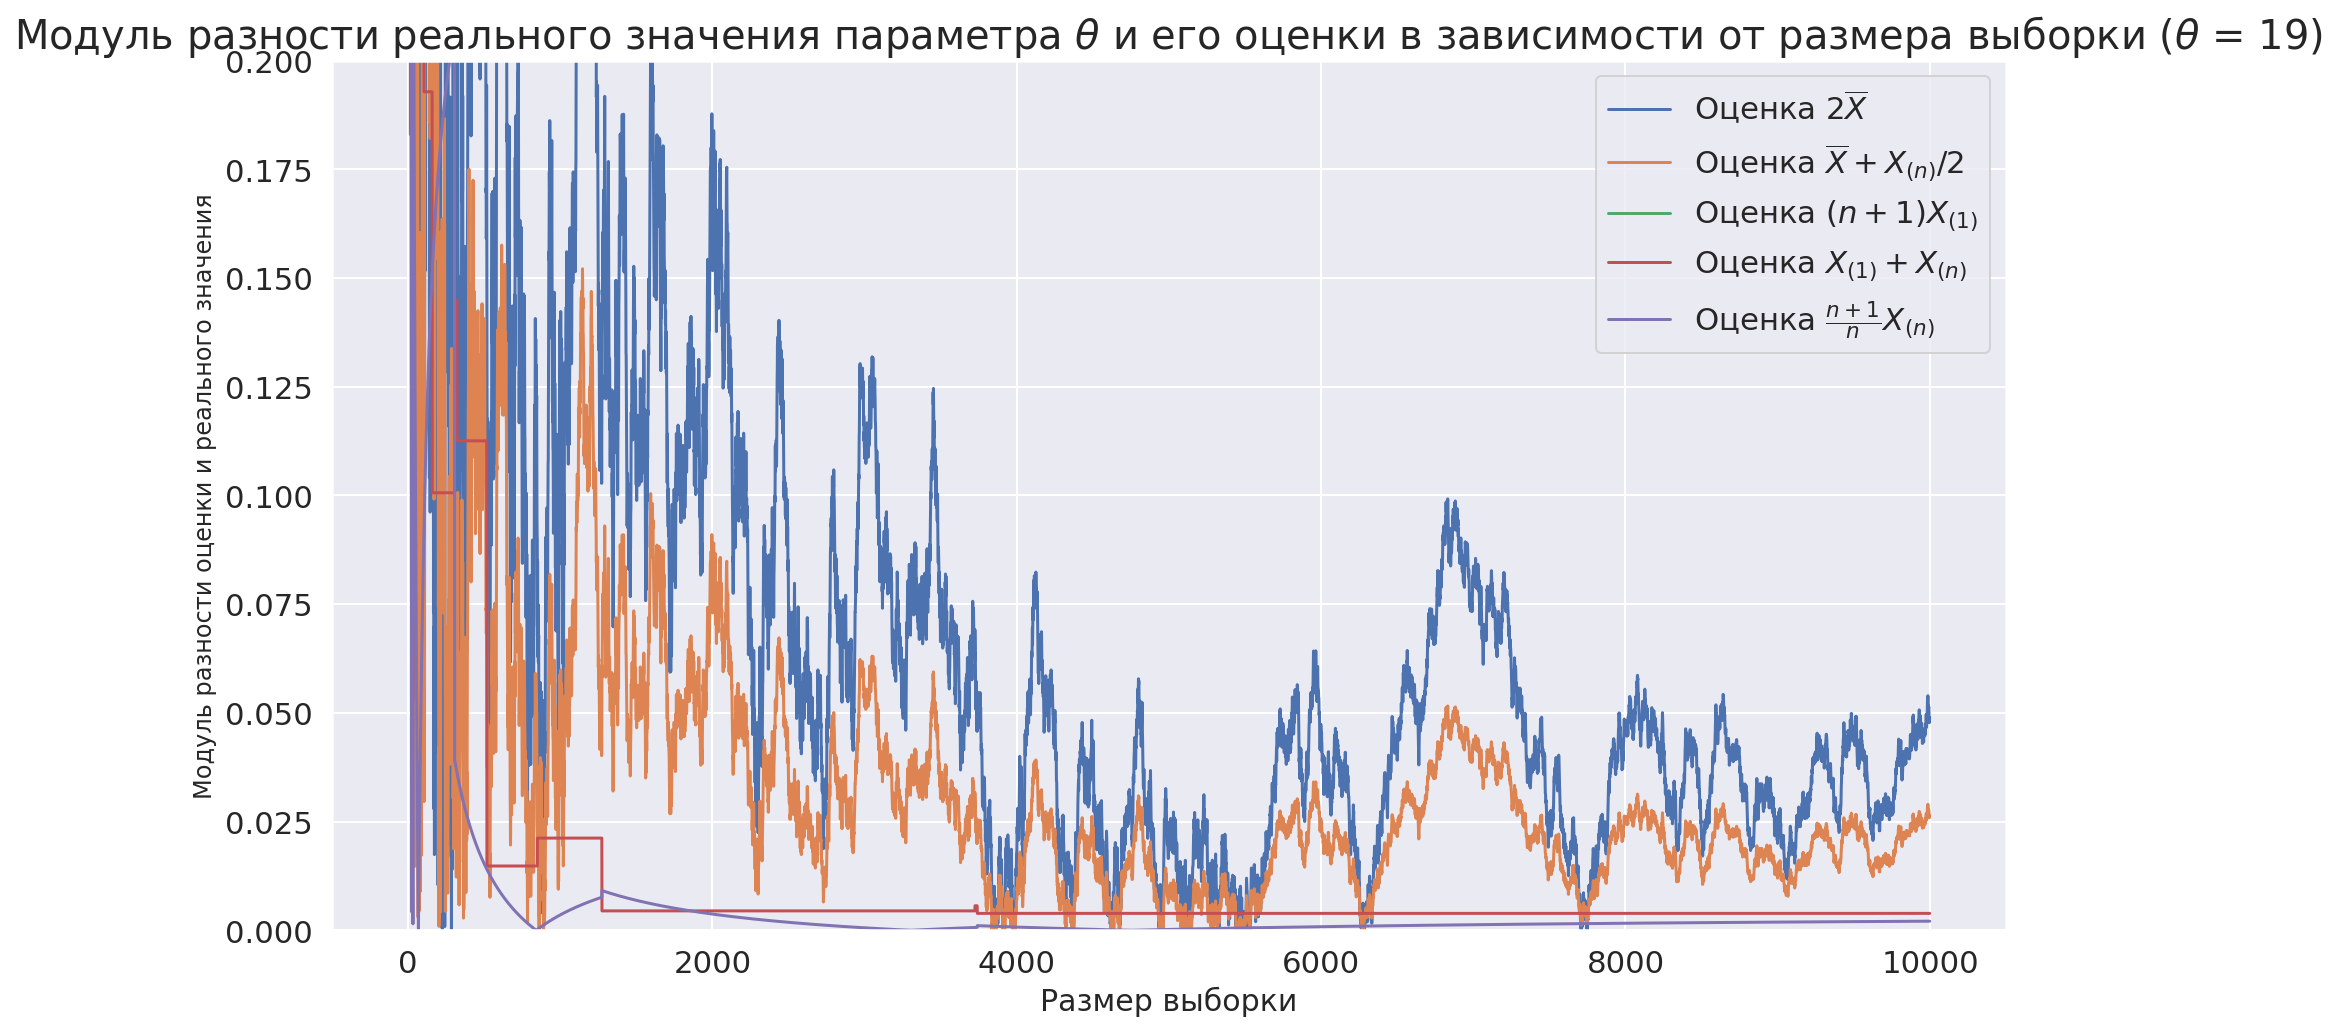

In [ ]:
draw_uniform_estimations_by_sample(
    sps.uniform.rvs(loc=0, scale=THETA_VALUES[2], size=N),
    THETA_VALUES[2],
    y_max=0.2)

Сделайте вывод.


__Вывод:__ Как мы видим, другие графики подтверждают вывод, сделанный выше – оценки $X_{(1)}+X_{(n)}$ и $\frac{n+1}{n} X_{(n)}$ являются лучшими для равномерного распределения, если в качестве метрики брать модуль разность значения оценки и реального значения. На многих графиках даже видно, что при N = n, остальные оценки отличаются от реального значения сильно больше чем у двух 
оценок выше.

### Задача 2

Придумайте распределение, у которого конечны первые два момента, а третий – нет. Сгенерируйте выборку $X_1, \dots, X_N$ из этого распределения для $N = 10^4$. 

Придумал распределение с плотностью $p(x) = \frac{3}{x^4}\cdot I(x >= 1)$. Идея была в том, чтобы взять фукнцию интеграл от которой известно что сходится, а также чтобы сходились интегралы от функций $p(x) \cdot x$ и $p(x) \cdot x^2$. Из матана знаем что самый простой пример такой функции – это $\frac{1}{x^{\alpha}}$ на множестве от 1 до $+\infty$ с соответствующим коэфциентом, чтобы интеграл плотности был равен 1.

А потом мне сказали, что такое распределение уже есть в scipy.stats и называется распределение Парето... Поэтому дальше я использовал его.

In [ ]:
sample = sps.pareto.rvs(b=3, size=N)

Постройте график плотности, а также нанесите точки выборки на график (с нулевой y-координатой)

**Подсказка**: Может быть полезен параметр `alpha` в функции `plt.plot`

In [ ]:
def draw_pdf_and_sample(sample: np.array):
  grid = np.linspace(1, 12, 1000)

  plt.figure(figsize=(16 ,8)) 

  plt.scatter(
      sample, 
      np.zeros(N), 
      alpha=0.2, 
      label='Значения элементов выборки',
  )

  plt.plot(
      grid, 
      sps.pareto.pdf(grid, b=3), 
      color='red', 
      linewidth=3, 
      label='Плотность распределения Pareto(3)',
      alpha=0.6,
  )
  plt.xlim(0.5, 13)
  plt.legend(fontsize=14, loc=1)
  plt.title(
      r'График плотности $\xi \sim Pareto(3)$ и значения элементов выборки',
      fontsize=20)
  plt.show()

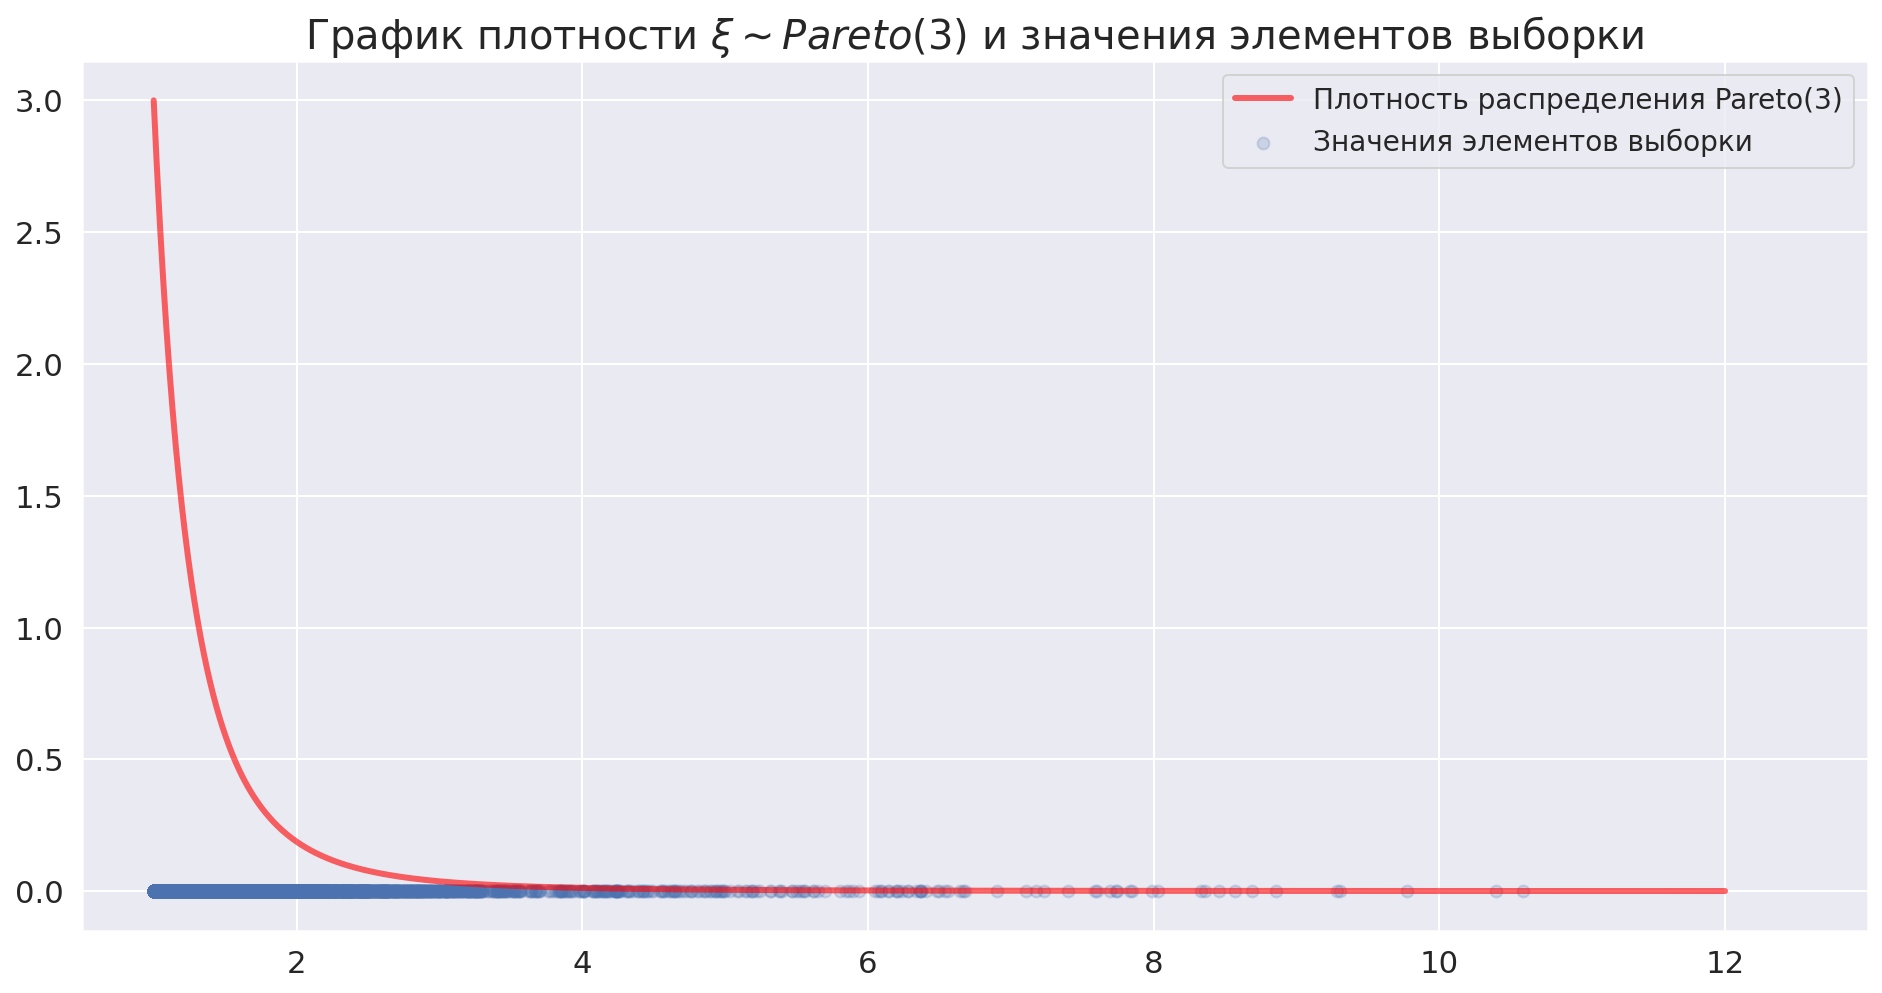

In [ ]:
draw_pdf_and_sample(sample)

Для всех $n \leq N$ посчитайте оценку $s^2 = s^2(X_1,\dots, X_N)$ для дисперсии.

Будем считать по формуле $s^2 = \overline{X^2} - \overline{X}^2$

In [ ]:
var_estimation = np.cumsum(np.power(sample, 2)) / (np.arange(N) + 1) - \
                  np.power(np.cumsum(sample) / (np.arange(N) + 1), 2)

Постройте график зависимости модуля разности оценки дисперсии и ее истинного значения от $n$.

Настоящая дисперсия в нашем случае равна 0.75.

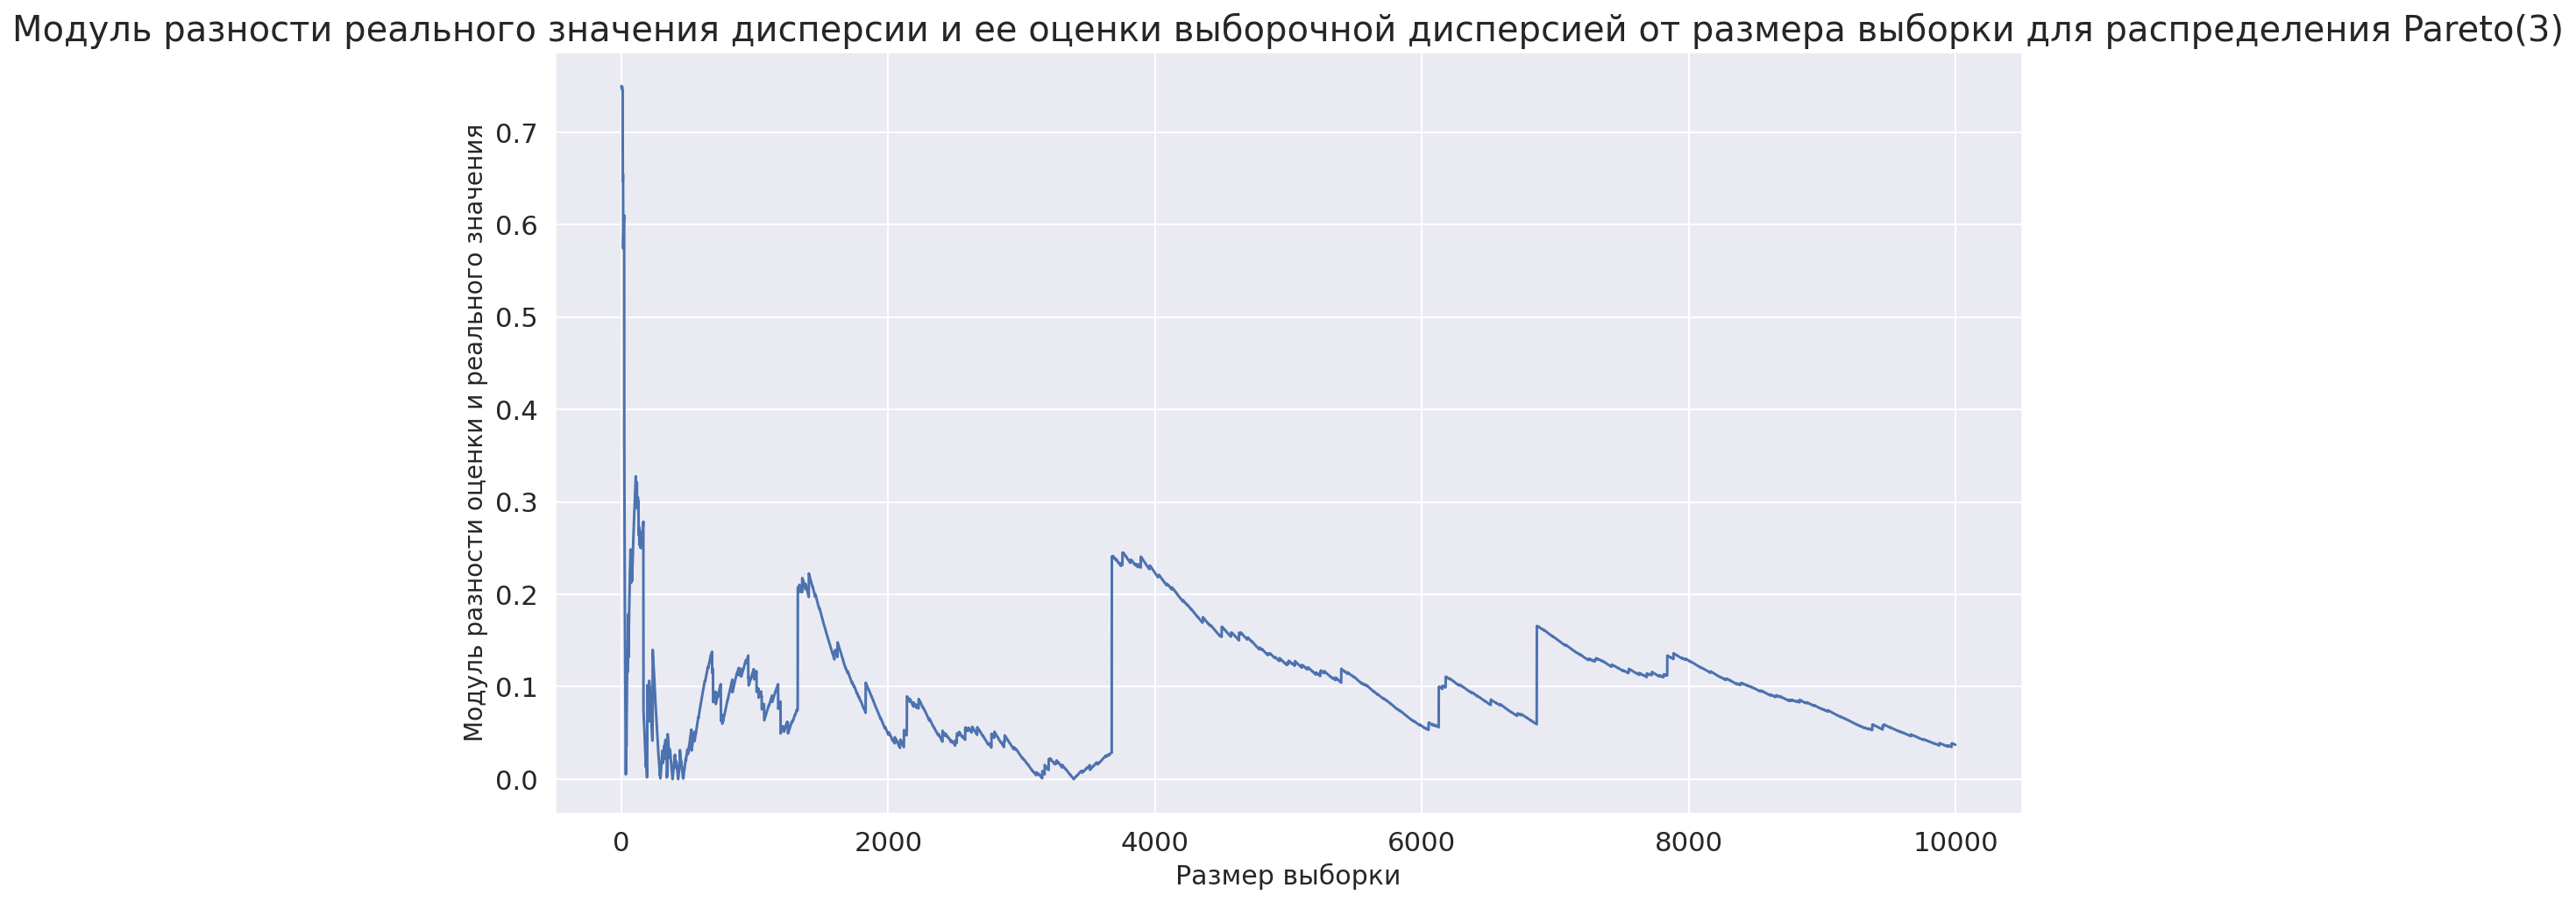

In [ ]:
real_var_array = np.zeros(N) + sps.pareto.var(b=3)
grid = np.arange(N)
fig, axis = plt.subplots()
fig.set_size_inches(15, 8)
    
axis.set_title(
    r'Модуль разности реального значения дисперсии и ее оценки ' +
    r'выборочной дисперсией от размера выборки ' +
    r'для распределения Pareto(3)',
    fontsize = 20,
)
    
axis.set_xlabel('Размер выборки', fontsize=15)
axis.set_ylabel('Модуль разности оценки и реального значения', fontsize=14)
axis.plot(
  grid, 
  np.absolute(var_estimation - real_var_array),
)
plt.show()

Проведите аналогичное исследование для выборки из распределения Коши, где вместо графика модуля разности оценки дисперсии и ее истинного значения (которого не существует) постройте график оценки дисперсии. 


In [ ]:
sample = sps.cauchy.rvs(size=N)

In [ ]:
var_estimation = np.cumsum(np.power(sample, 2)) / (np.arange(N) + 1) - \
                  np.power(np.cumsum(sample) / (np.arange(N) + 1), 2)

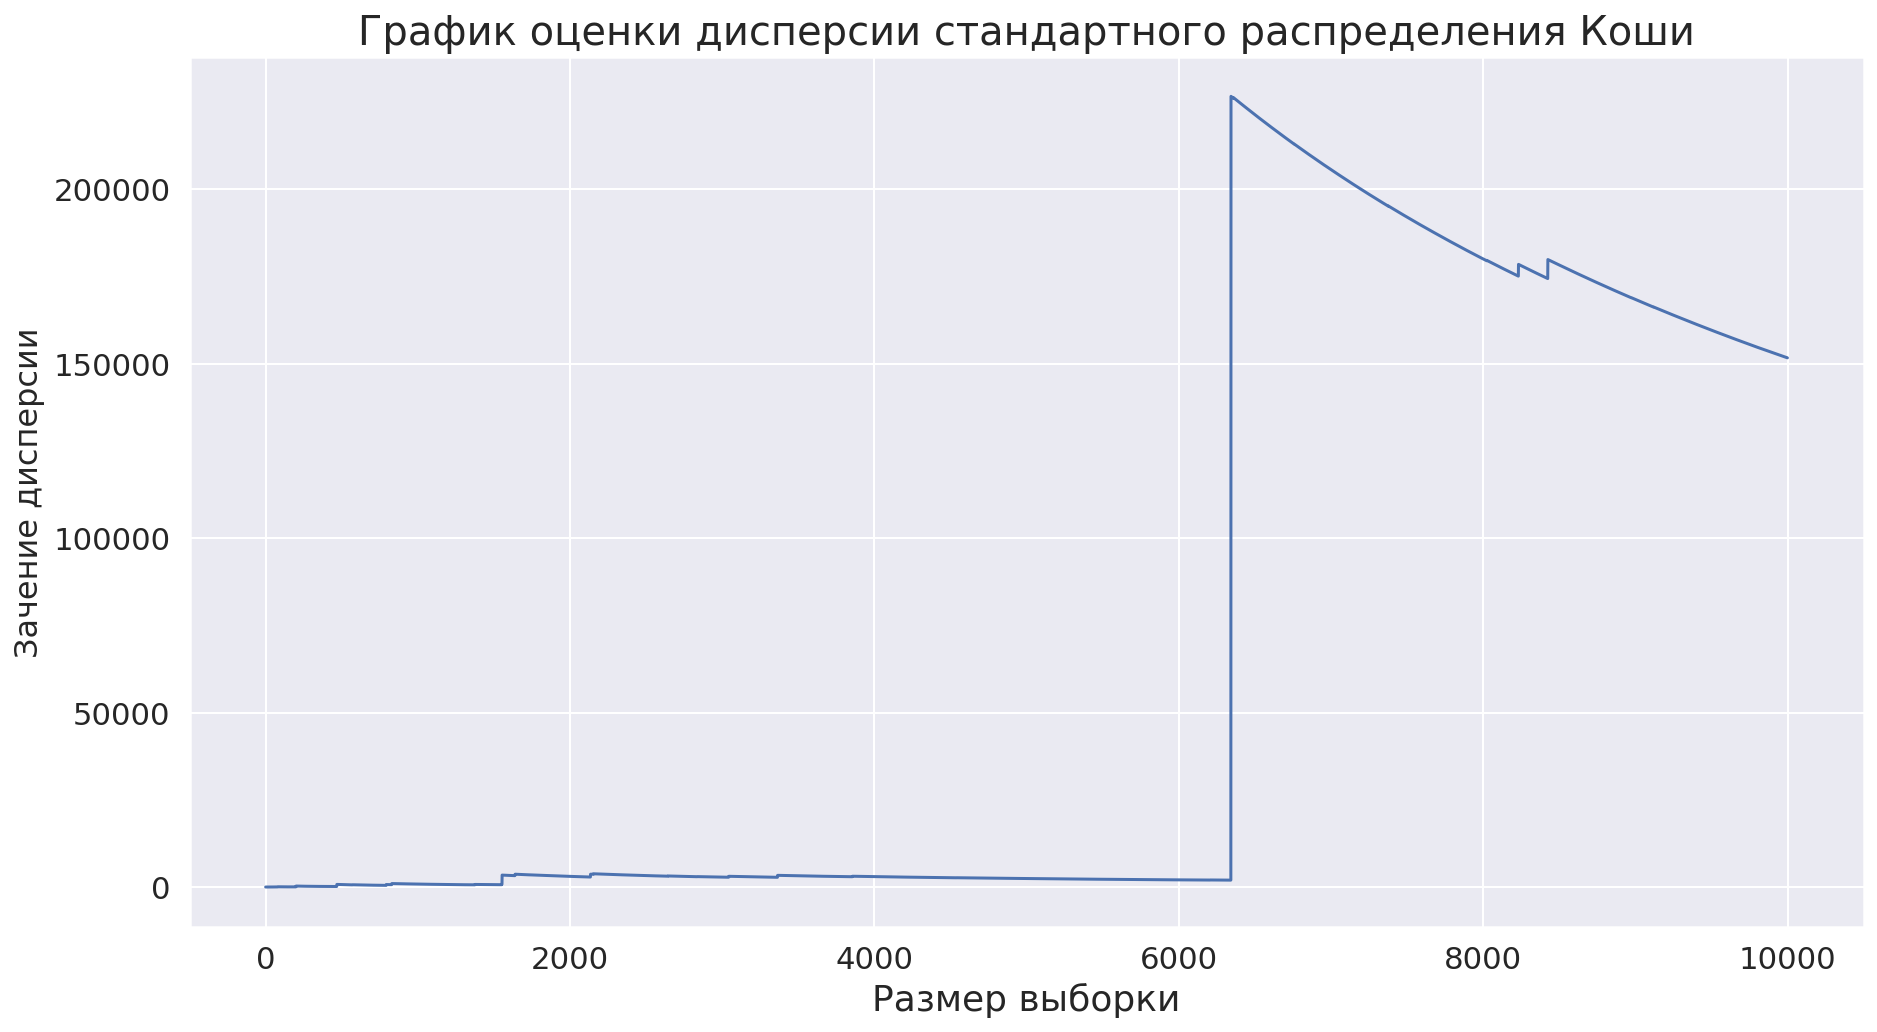

In [ ]:
grid = np.arange(N)
fig, axis = plt.subplots()
fig.set_size_inches(15, 8)
    
axis.set_title(
    'График оценки дисперсии стандартного распределения Коши',
    fontsize = 20
)
    
axis.set_xlabel('Размер выборки', fontsize=18)
axis.set_ylabel('Зачение дисперсии', fontsize=16)
axis.plot(
  grid, 
  var_estimation,
)
plt.show()

__Вывод__ В случае графика для распределения Парето, видно, что модуль разности оценки и реального значения дисперсии, хоть оценка и смещенная, при больших `n` мал, что значит, что данная оценка при больших размерах выборки в каком-то смысле неплохо оценивает дисперсию. В случае с распределением Коши, которое вообще не имеет реальной дисперсии видно, что при больших значениях `n` значение оценки только увеличивается или ведет себя очень странно (по разному от запуска к запуску) и не видно тенденции к сходимости куда-то.

### Задача 3

Сгенерируйте выборку $X_1,\dots, X_N$ из стандартного нормального распределения для $N = 10^4$.

In [ ]:
sample = sps.norm.rvs(size=N)
sample

array([ 0.54130673,  0.34309844, -1.81488961, ..., -0.76951145,
       -0.80404243, -0.46484636])

Для всех $n \leqslant N$ посчитайте по ней эмпирическую функцию распределения.


In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF  # can be useful, but not necessary

def count_ecdf_on_prefix_subsamples(sample: np.array) -> list:
  result = list()
  for i in range(1, N + 1):
    subsample = sample[:i]
    result.append(ECDF(subsample))
  return result

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
ECDF_FUNCS = count_ecdf_on_prefix_subsamples(sample)

In [ ]:
print(len(ECDF_FUNCS))

10000


Для некоторых n (например, $n \in \{10,25,50,100,1000,N\}$ постройте графики эмпирической функции распределения (отметьте на оси абсцисс точки "скачков" кривых, нанеся каждую из "подвыборок" на ось абсцисс на каждом соответствующем графике с коэффициентом прозрачности `alpha=0.2`), нанеся на каждый из них истинную функцию распределения (количество графиков равно количеству различныз значений $n$).

In [ ]:
N_VALUES = [10, 25, 50, 100, 1000, N]

In [ ]:
def compare_ecdf_and_cdf(
    sample: np.array,
    ecdf_func: ECDF,
    n: int,
    x_min: int = None,
    x_max: int = None):
    grid = np.linspace(-100, 100, 1000)
    fig, axis = plt.subplots()
    fig.set_size_inches(15, 8)
    
    axis.set_title(
        r'Графики эмпирической и теоретической функций распределения для ' +
        r'n = {}'.format(n),
        fontsize = 20,
    )
    
    axis.set_xlabel('Размер выборки', fontsize=15)
    axis.set_ylabel('Модуль разности оценки и реального значения', fontsize=12)

    plt.scatter(
      sample, 
      np.zeros(n), 
      alpha=0.2, 
      label='Значения элементов выборки',
    )
    if x_min is not None and x_max is not None:
      axis.set_xlim(x_min, x_max)
  
    plt.plot(
      grid, 
      sps.norm.cdf(grid), 
      color='green', 
      linewidth=3, 
      label='Функция распределения $\mathcal{N}(0, 1)$',
      alpha=0.6,
    )

    plt.plot(
      np.sort(sample), 
      ecdf_func(np.sort(sample)), 
      color='red', 
      linewidth=3, 
      label='Эмпирическая функция распределения $\mathcal{N}(0, 1)$',
      alpha=0.6,
      drawstyle='steps-post',
    )

    axis.legend()
    plt.show()
    return 

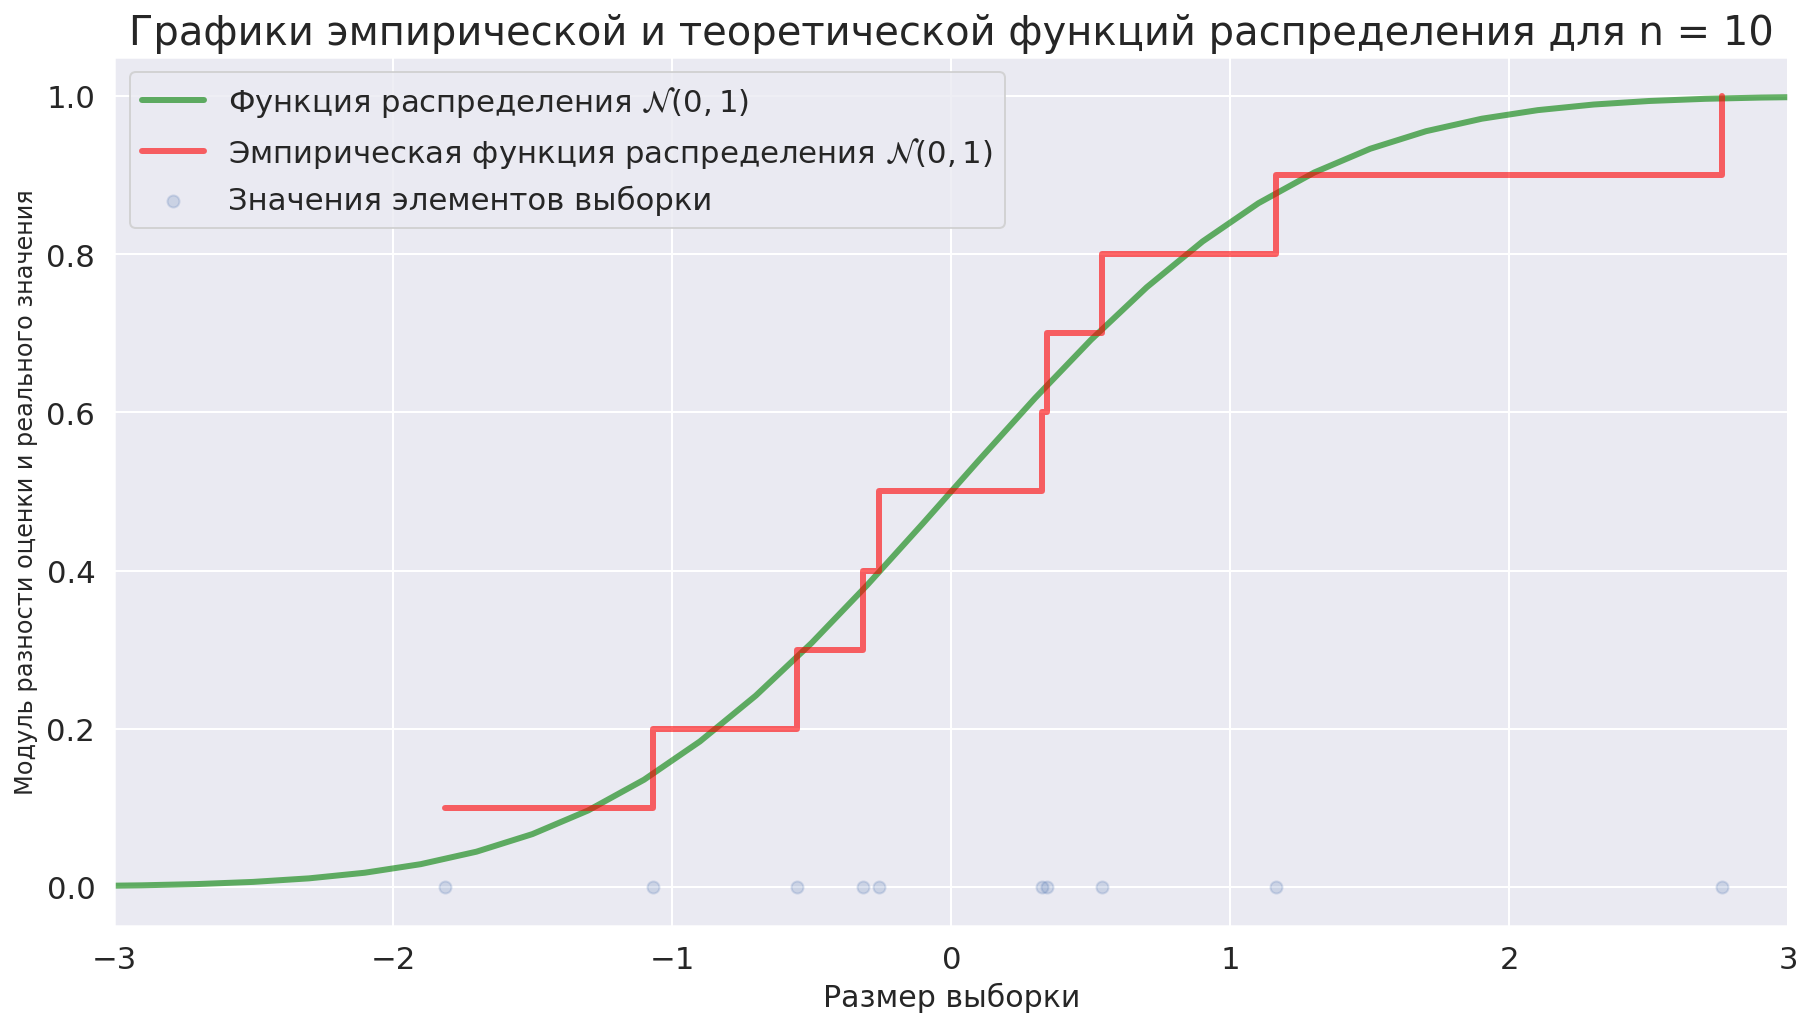

In [ ]:
compare_ecdf_and_cdf(
    sample[:N_VALUES[0]],
    ECDF_FUNCS[N_VALUES[0]-1],
    N_VALUES[0],
    x_min=-3, x_max=3)

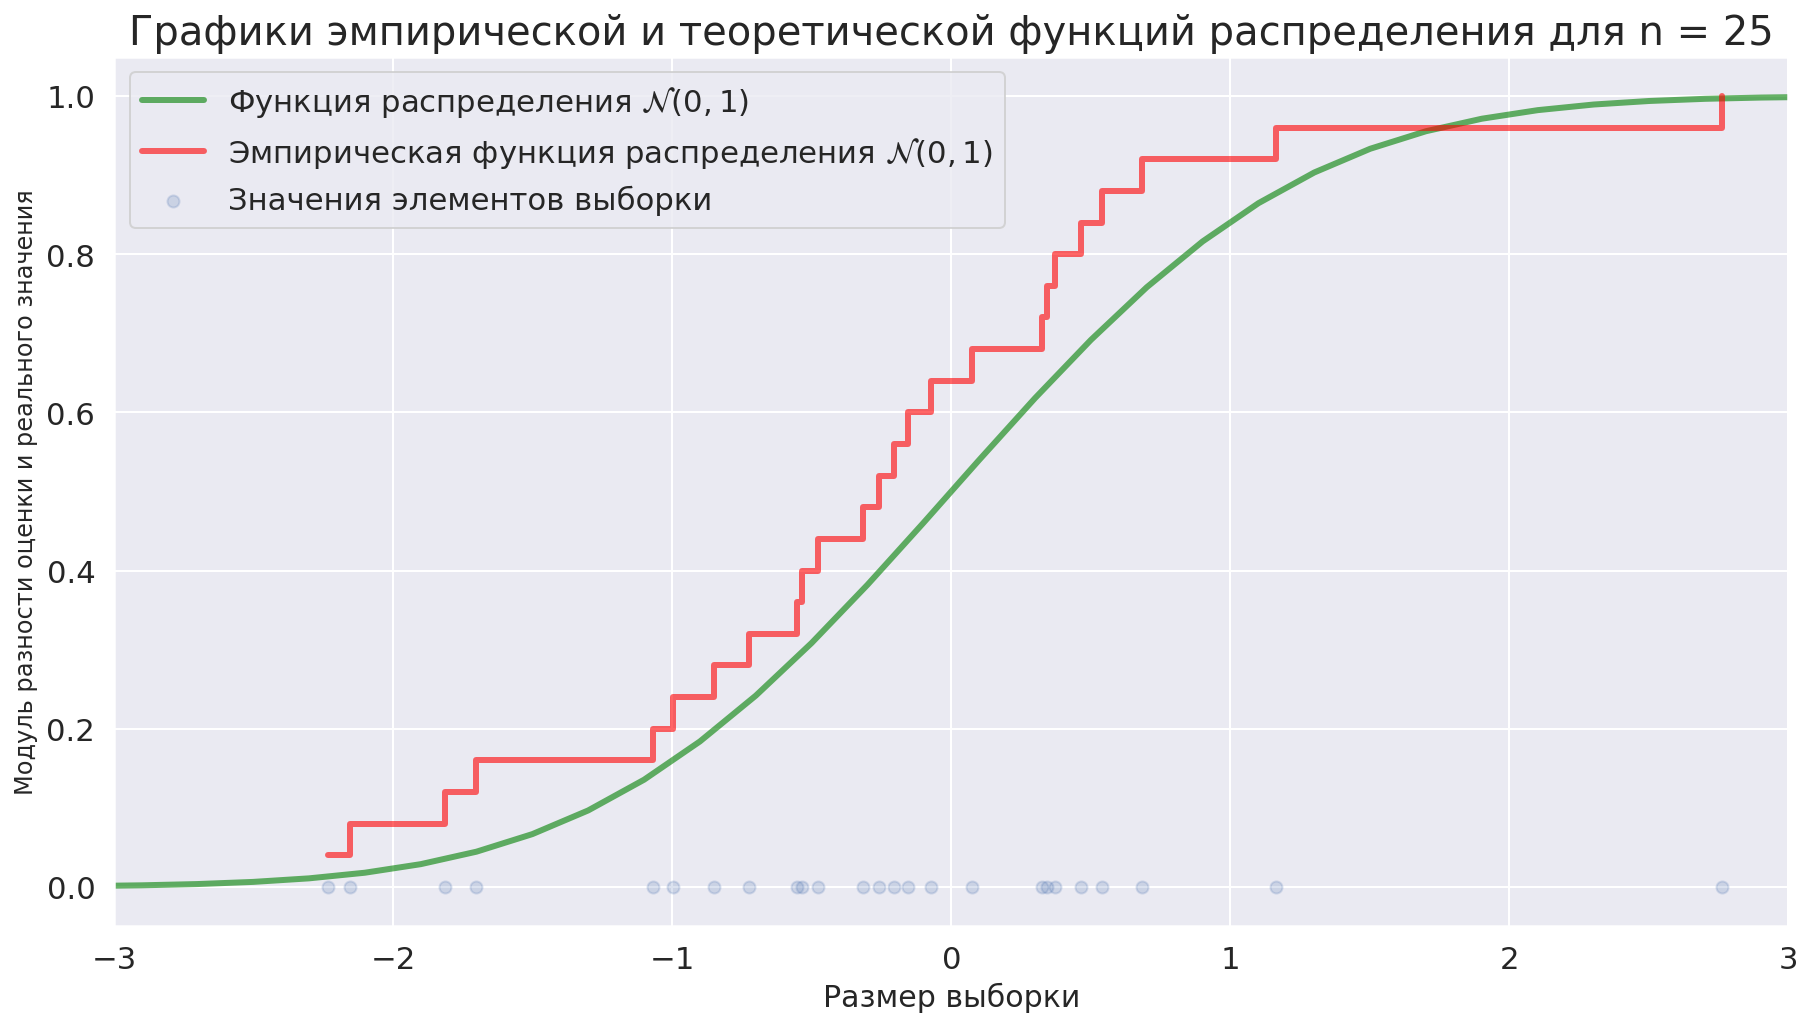

In [ ]:
compare_ecdf_and_cdf(
    sample[:N_VALUES[1]],
    ECDF_FUNCS[N_VALUES[1]-1],
    N_VALUES[1],
    x_min=-3, x_max=3)

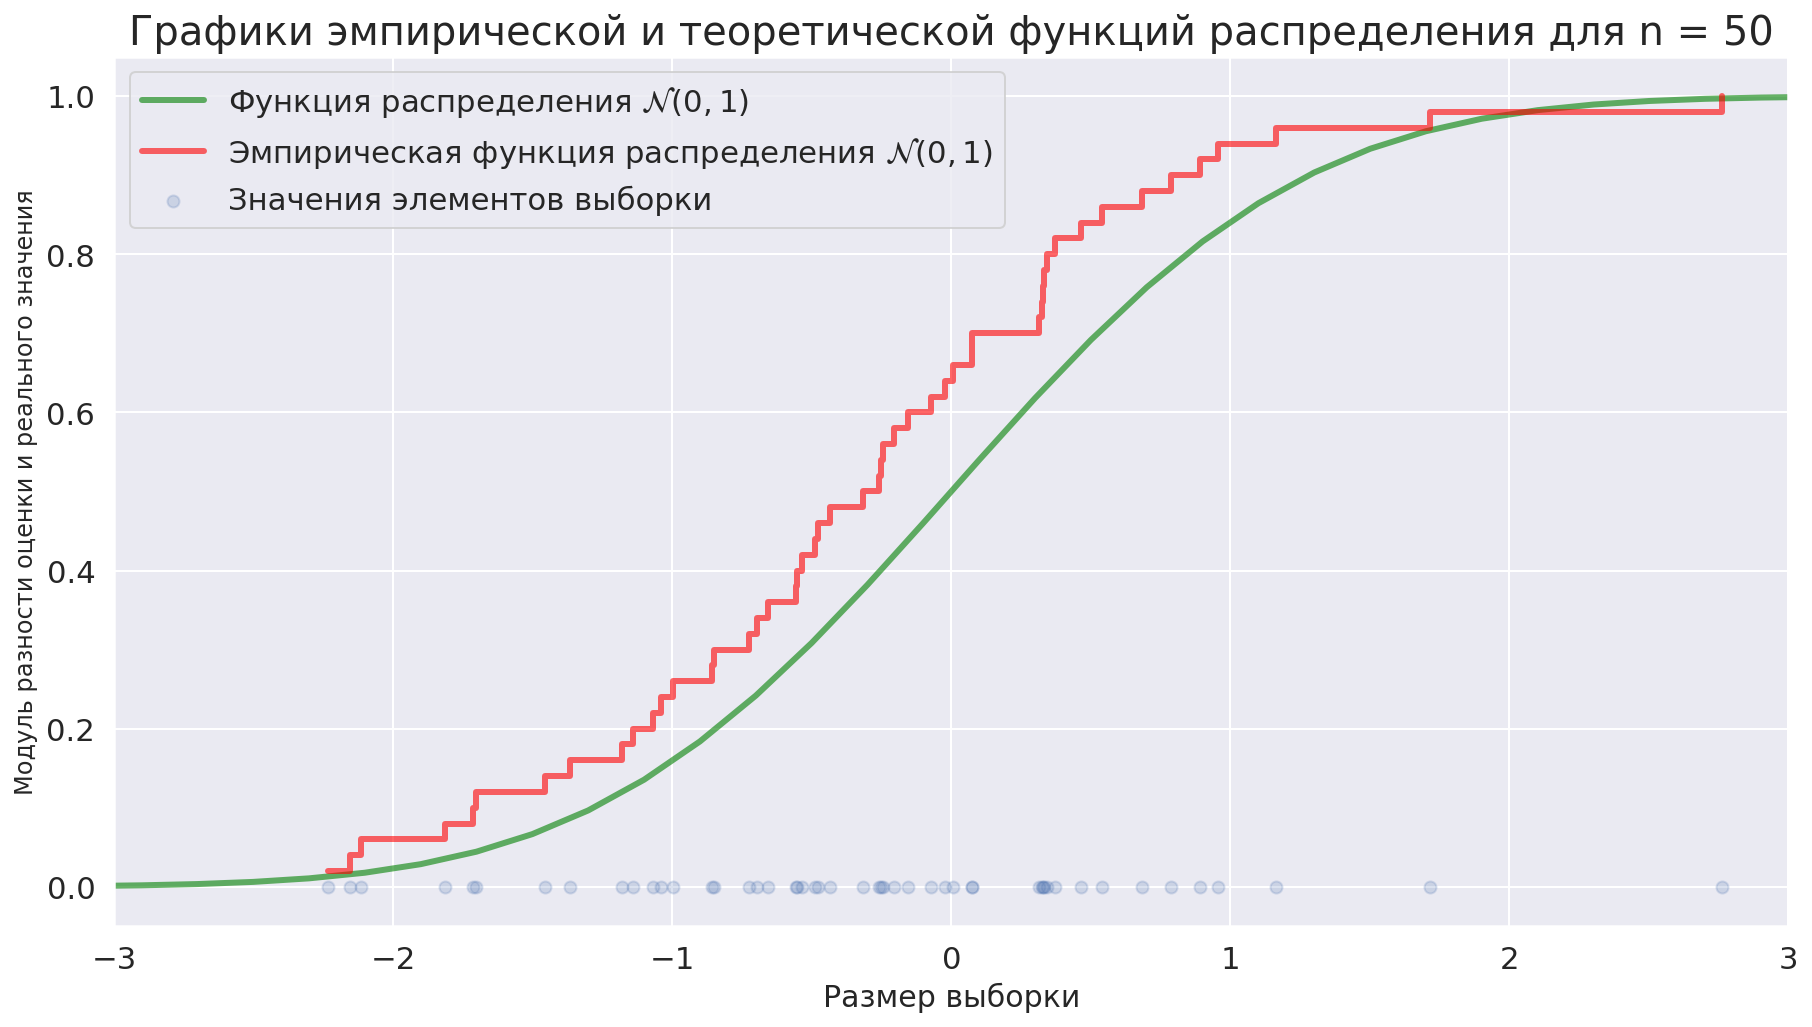

In [ ]:
compare_ecdf_and_cdf(
    sample[:N_VALUES[2]],
    ECDF_FUNCS[N_VALUES[2]-1],
    N_VALUES[2],
    x_min=-3, x_max=3)

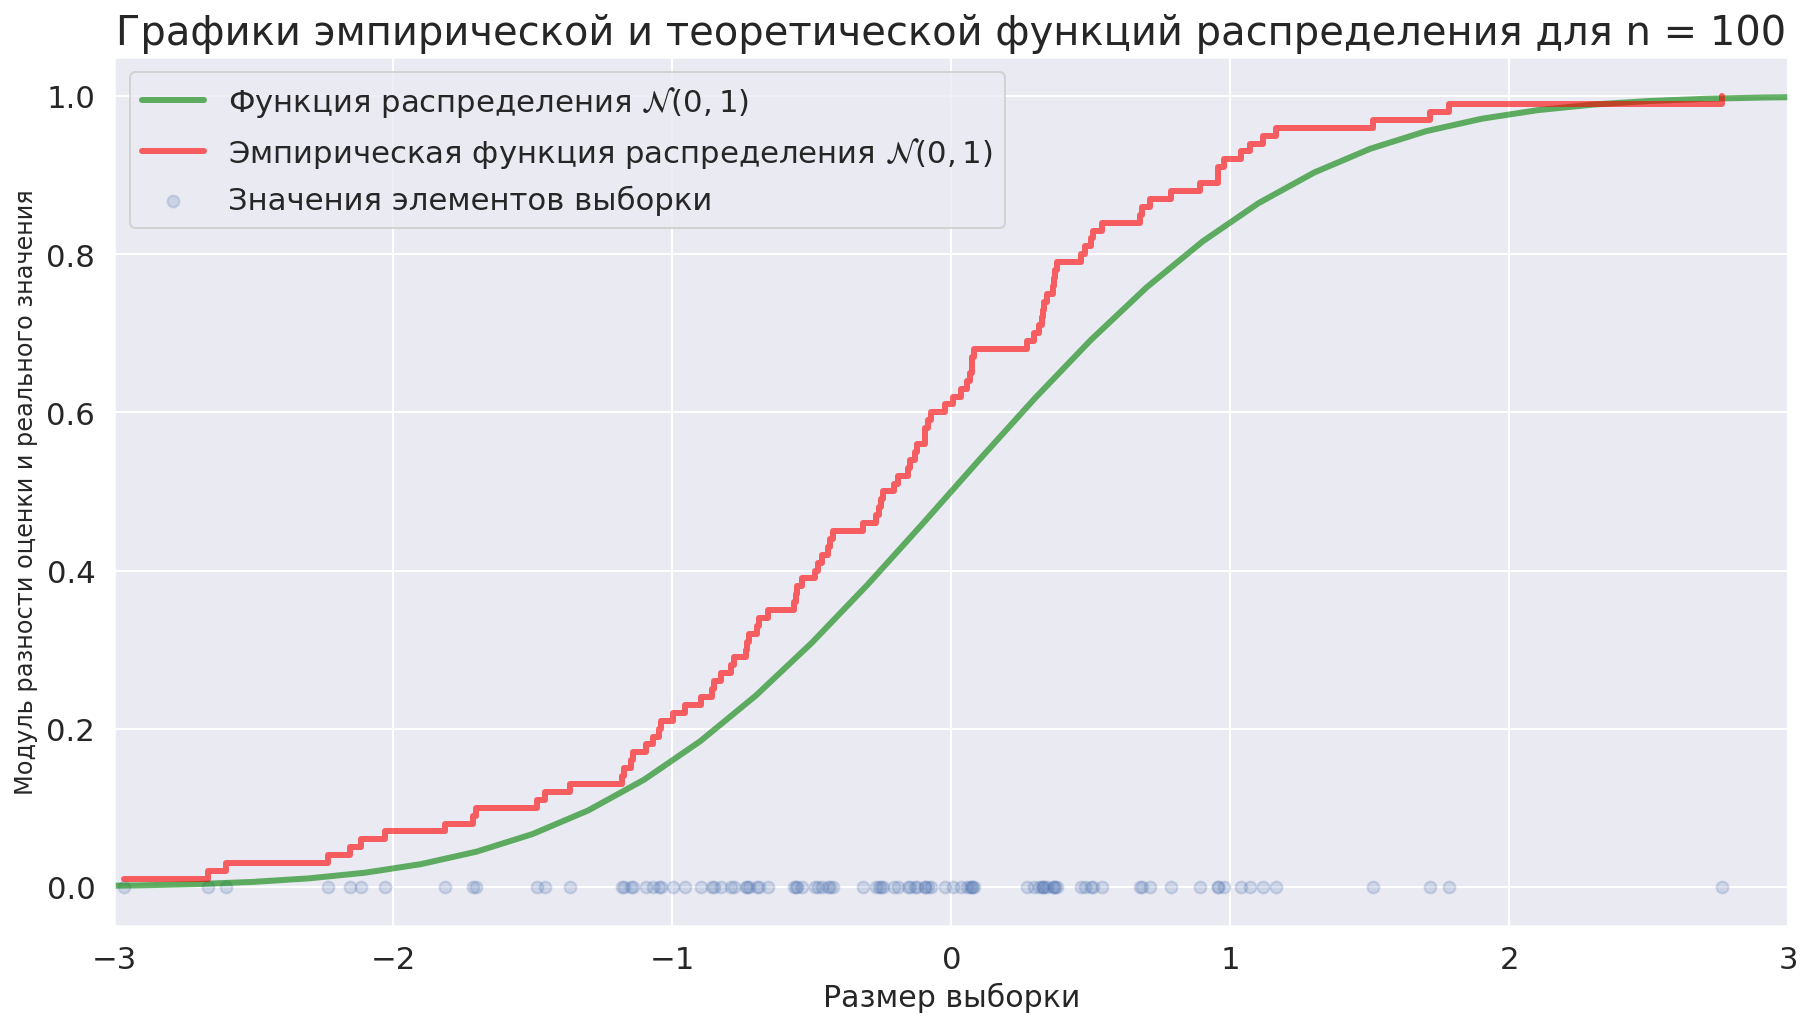

In [ ]:
compare_ecdf_and_cdf(
    sample[:N_VALUES[3]],
    ECDF_FUNCS[N_VALUES[3]-1],
    N_VALUES[3],
    x_min=-3, x_max=3)

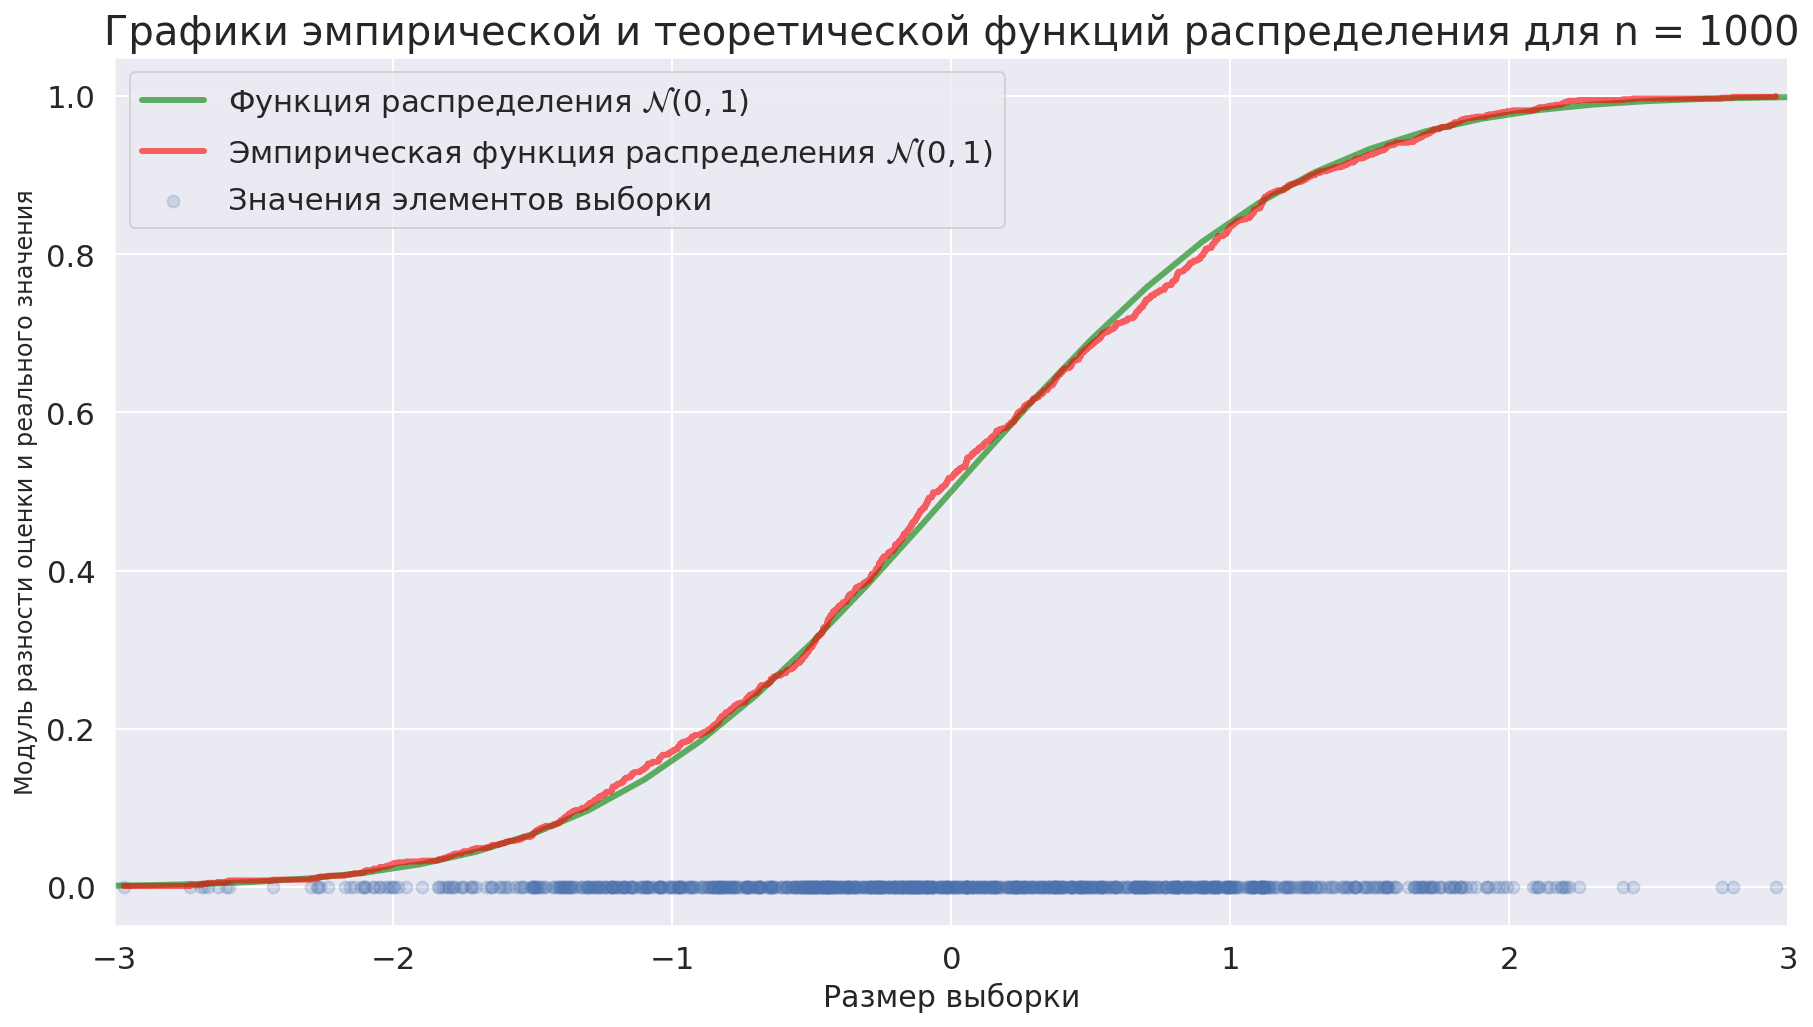

In [ ]:
compare_ecdf_and_cdf(
    sample[:N_VALUES[4]],
    ECDF_FUNCS[N_VALUES[4]-1],
    N_VALUES[4],
    x_min=-3, x_max=3)

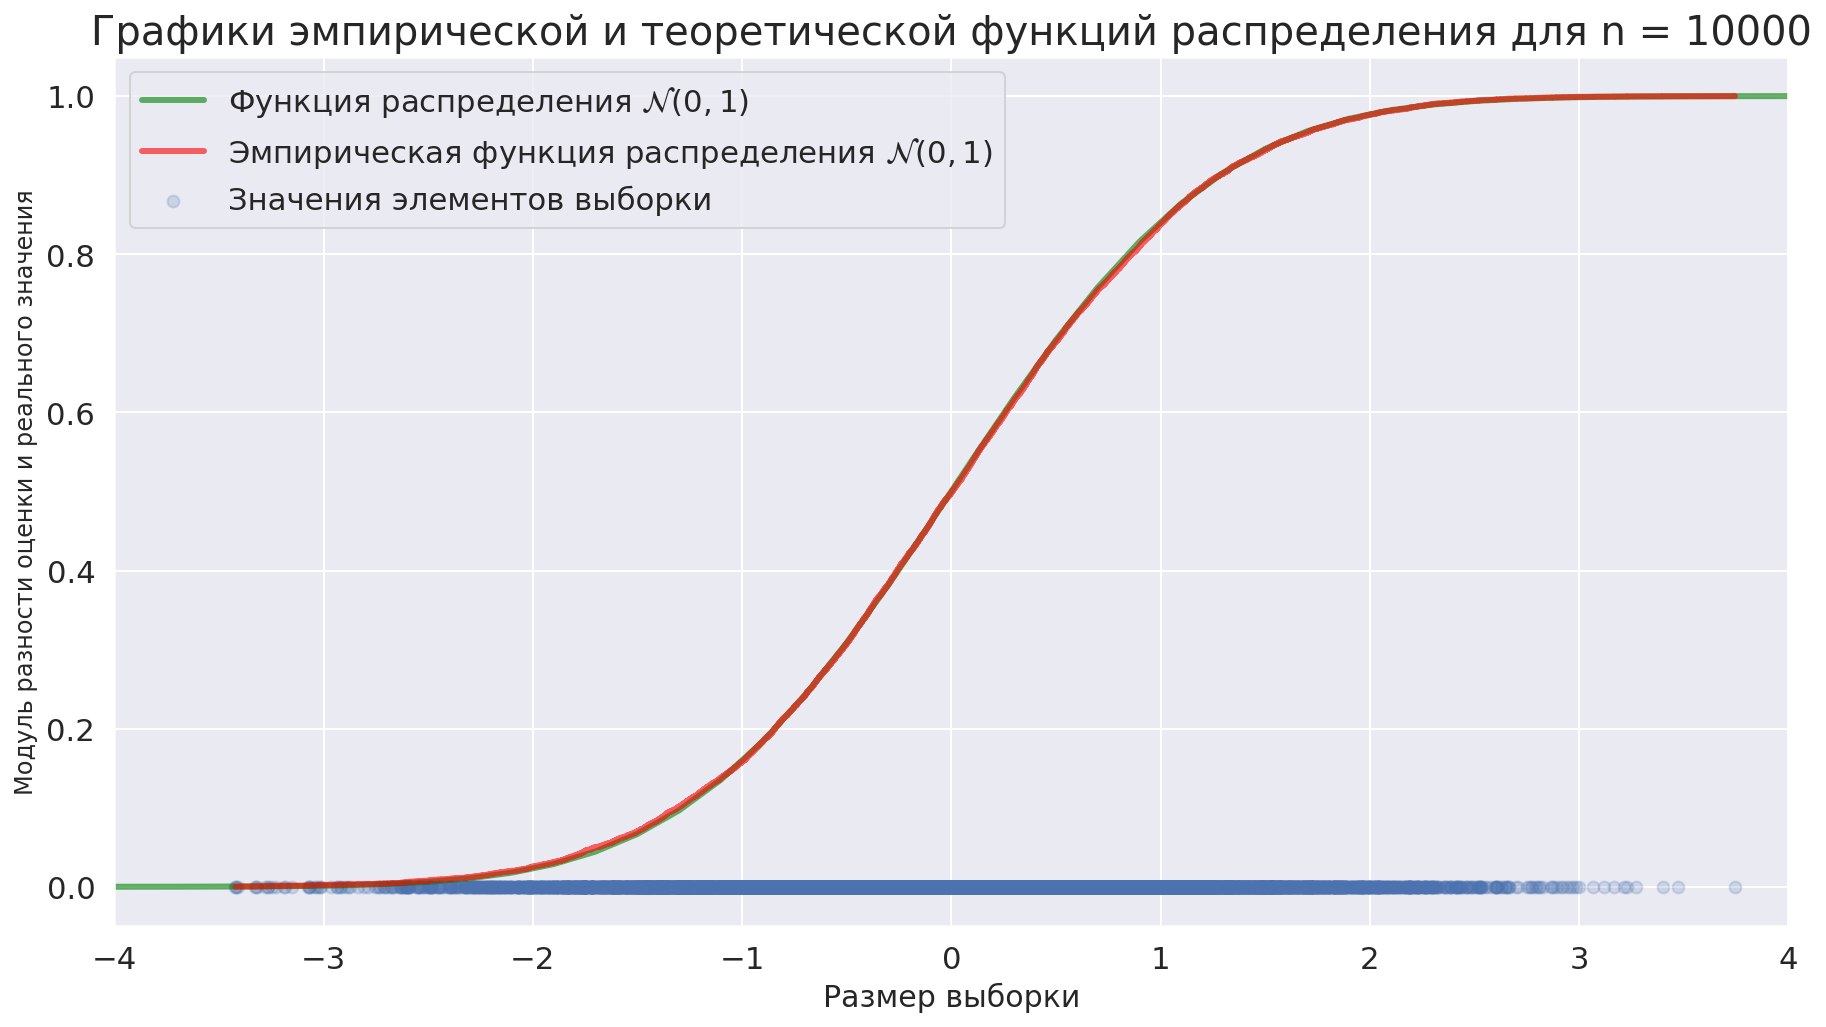

In [ ]:
compare_ecdf_and_cdf(
    sample[:N_VALUES[5]],
    ECDF_FUNCS[N_VALUES[5]-1],
    N_VALUES[5],
    x_min=-4, x_max=4)

__Вывод__ Как видно при больших размерах выборки эмперическая функция распределения совпадает с теоретической фукнцией распределения, то есть как минимум имеет место поточечная сходимость.

Для всех $n ≤ N$ посчитайте точное значение $D_n = \displaystyle{\sup_{x∈R}} | \hat{F}_n(x)−F(x)|$ и постройте график зависимости статистик $D_n$ и $\sqrt{n}D_n$ от $n$. 


Так как фукнция распределения неубывает, то чтобы посичитать супермум разности ступенчатой фукнцией и теоретической ф.р. достаточно посчитать модуль разности в точках "скачков" и найти среди них максимум, так как точек конечное число.

In [ ]:
def calculate_d_sequence() -> np.array:
  d_n_result = np.zeros(N)
  for i in range(N):
    subsample = sample[:i + 1]
    d_n_result[i] = np.max(np.absolute(ECDF_FUNCS[i](subsample) - sps.norm.cdf(subsample)))
  return d_n_result

In [ ]:
d_n = calculate_d_sequence()
d_n

array([0.29414809, 0.29414809, 0.2985629 , ..., 0.00681015, 0.00679061,
       0.00677108])

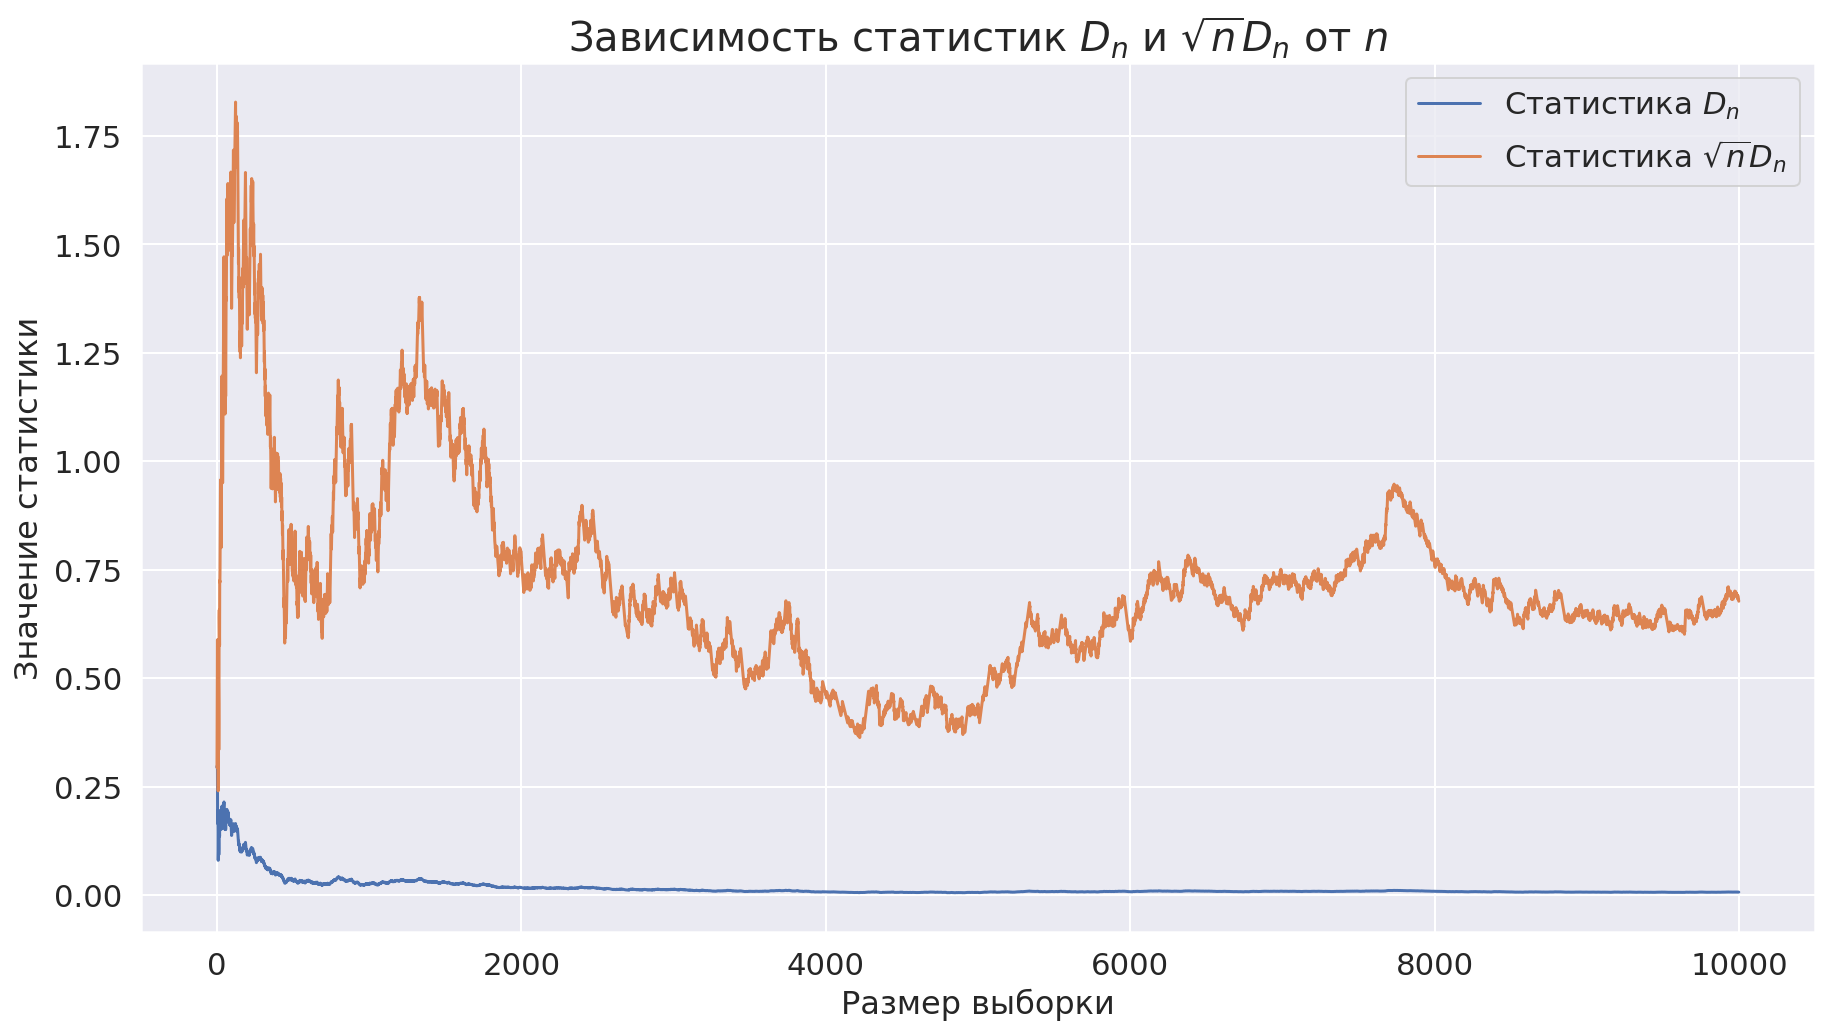

In [ ]:
grid = np.arange(N)
fig, axis = plt.subplots()
fig.set_size_inches(15, 8)
    
axis.set_title(
    r'Зависимость статистик $D_n$ и $\sqrt{n}D_n$ от $n$',
    fontsize = 20,
)
    
axis.set_xlabel('Размер выборки', fontsize=16)
axis.set_ylabel('Значение статистики', fontsize=16)
axis.plot(
  grid, 
  d_n,
  label=r'Статистика $D_n$',
)
axis.plot(
  grid, 
  d_n * np.sqrt(np.arange(N) + 1),
  label=r'Статистика $\sqrt{n}D_n$',
)
axis.legend()
plt.show()

__Вывод__ Как видно из графиков статистика $D_n$ при больших $n$ близка по значению к 0, что подтверждает теоретический факт под названием Теорема Гливенко — Кантелли, которая утверждает, что такая статистика сходится по вероятности к 0.

Про статистику $\sqrt{n}D_n$ из графика ничего отличительного не видно, но по  Теореме Колмогорова утверджается, что такая с.в. стремится по распределению к с.в. с распределением Колмогорова. Стремление по распределению из одного такого графика понять и не получится. 

### Задача 4

Сгенерируйте $N_{\text{samples}}=400$ выборок из равномерного распределения $U_{[0, \theta]} \ \theta=1$ размера $N=40$. Для каждой выборки посчитайте статистики $\hat\theta = 2\overline{X}, \ \theta^* = \frac{n+1}{n} X_{(n)}$. Постройте гистограмму получившихся значений каждой из статистик на одном графике, в качестве параметра `bins` функции `plt.hist` передайте значение ниже, а таккже передайте параметр `alpha=0.6`.

In [ ]:
N_samples = 400
N = 40
THETA = 1
bins = [i / 40 + 0.8 for i in range(18)]

In [ ]:
samples = sps.uniform.rvs(size=(N_samples, N))
samples

array([[0.87277817, 0.41258994, 0.19065745, ..., 0.76720952, 0.81988953,
        0.33561418],
       [0.48264491, 0.421758  , 0.59351687, ..., 0.9868165 , 0.65525673,
        0.2490467 ],
       [0.56427239, 0.80564913, 0.96220744, ..., 0.90078054, 0.12941601,
        0.79570903],
       ...,
       [0.30516176, 0.59943081, 0.51587039, ..., 0.56491012, 0.3759874 ,
        0.28633756],
       [0.4817161 , 0.38147821, 0.83027051, ..., 0.76870676, 0.66429016,
        0.80147071],
       [0.33320873, 0.40174669, 0.34181222, ..., 0.43055103, 0.15675035,
        0.8078958 ]])

In [ ]:
def get_estims_vectos(samples: np.array) -> List[np.array]:
  '''
    Calculate two estims from vector of samples
    Args:
      samples: 2-D array with size (N_samples, N) (vector of samples)

    Returns:
      List containing two vectors of \theta estimations
      in order listed in the task
  '''
  ns = np.full((N_samples), N)
  estims_1 = np.sum(samples, axis=1) / ns * 2
  estims_2 = np.max(samples, axis=1) * (ns + 1) / ns
  return [estims_1, estims_2]

In [ ]:
estims_vectors = get_estims_vectos(samples)

In [ ]:
  def draw_two_estims_hist(
      estims_vectors: List[np.array],
      id_to_estimation_name: Dict[int, str],
      title: str,
      custom_bins: Optional[List[float]] = None,
      x_min: int = None,
      x_max: int = None,
    ):
    fig, axis = plt.subplots()
    fig.set_size_inches(15, 8)
    
    axis.set_title(
        title,
        fontsize = 23
    )
    if x_min is not None and x_max is not None:
      axis.set_xlim(x_min, x_max)

    
    axis.hist(
        estims_vectors[0],
        bins=custom_bins if custom_bins else 20,
        density=False, 
        alpha= 0.5,
        label=r'Оценка {}'.format(id_to_estimation_name[0])
    )
    
    axis.hist(
        estims_vectors[1],
        bins = custom_bins if custom_bins else 20,
        density=False, 
        alpha= 0.5,
        label=r'Оценка {}'.format(id_to_estimation_name[1])
    )
    
    axis.set_xlabel('Значение оценки', fontsize=20)
    axis.set_ylabel('Количество оценок с таким значением', fontsize=18)
    axis.legend(loc='best')
    plt.show()
    return 

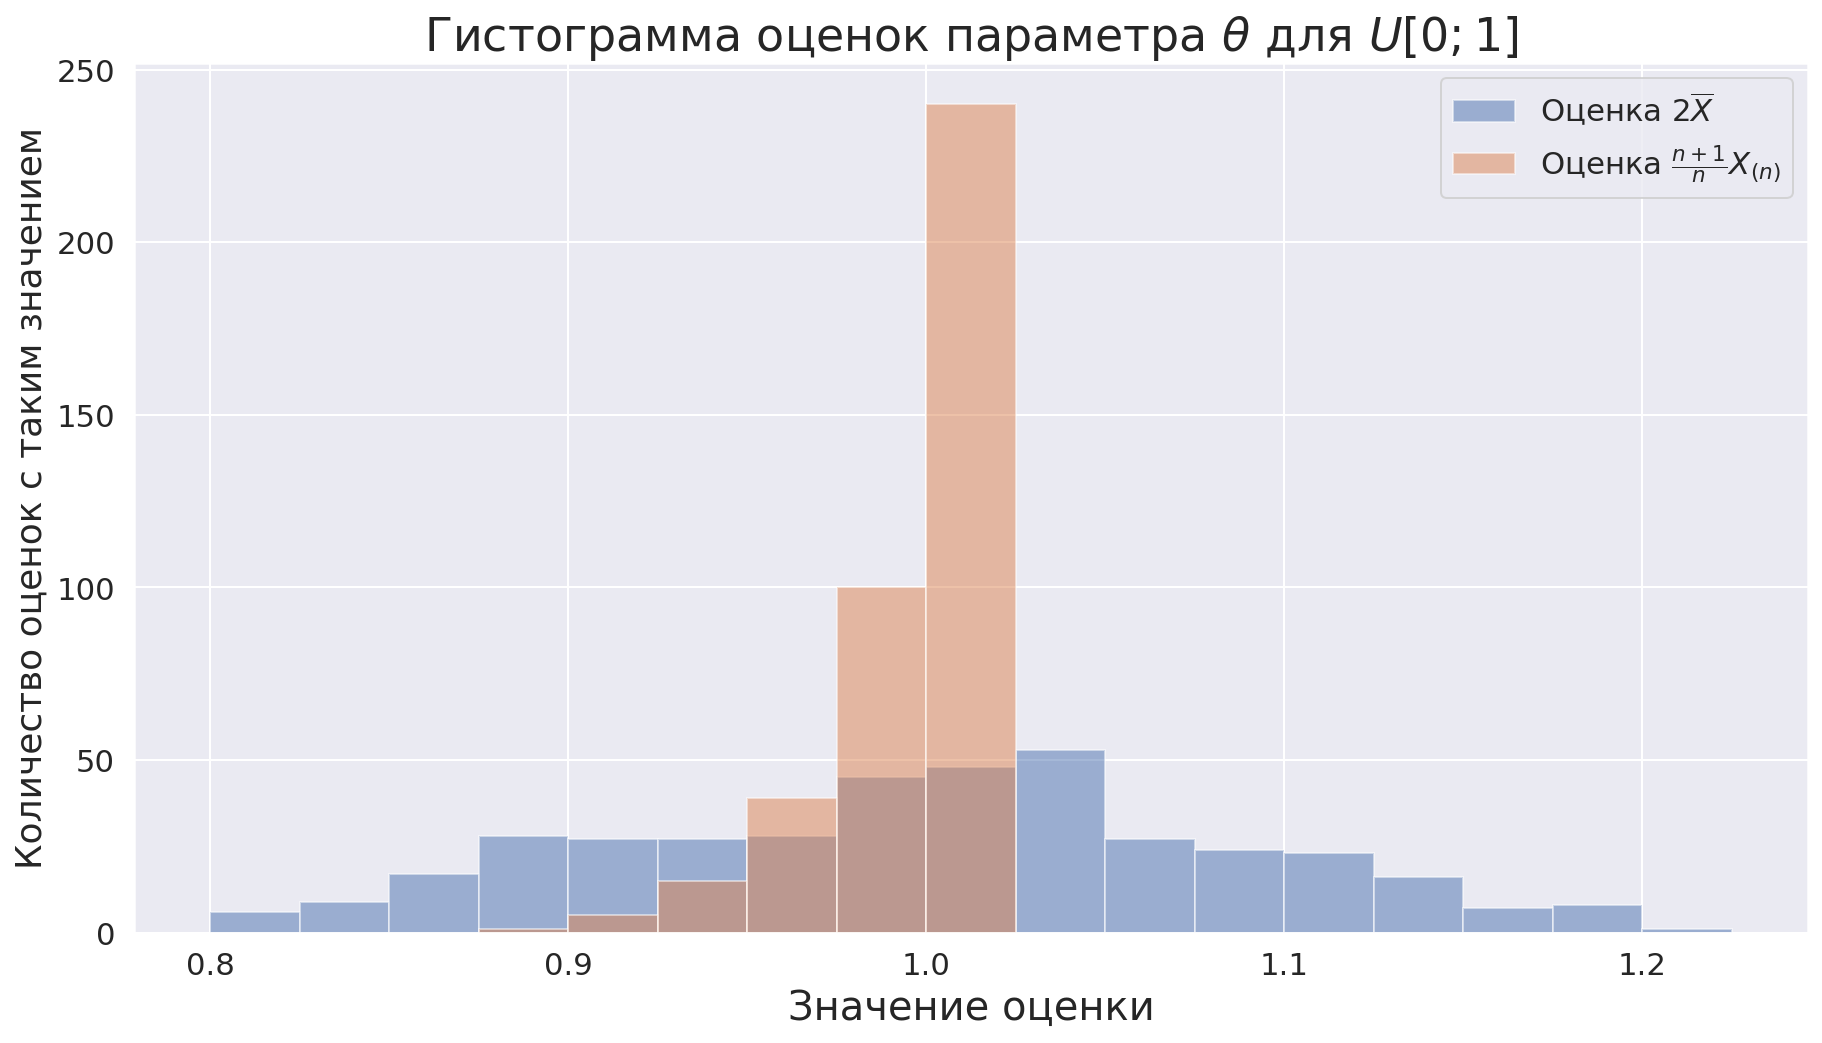

In [ ]:
draw_two_estims_hist(
    estims_vectors,
    id_to_estimation_name = {
      0: r'$2\overline{X}$',
      1: r'$\frac{n+1}{n} X_{(n)}$',
    },
    title=r'Гистограмма оценок параметра $\theta$ для $U[0; 1]$',
    custom_bins=bins
    )

__Вывод__ Как видно из графика оценка $\frac{n+1}{n}X_{(n)}$ лучше оценки $2\overline{X}$, потому что ее значения кучнее сосредоточены возле реального значения параметра распределения.

Постройте гистограммы для статистик $\sqrt{n} (\hat\theta - \theta)$ и $1 - n  (\theta^* - \theta)$

In [ ]:
stat_1 = (estims_vectors[0] - np.full((N_samples), THETA)) * np.sqrt(np.full((N_samples), N))
stat_2 = 1 - (np.full((N_samples), N)) * (estims_vectors[1] - np.full((N_samples), THETA))
stats_vectors = [stat_1, stat_2]

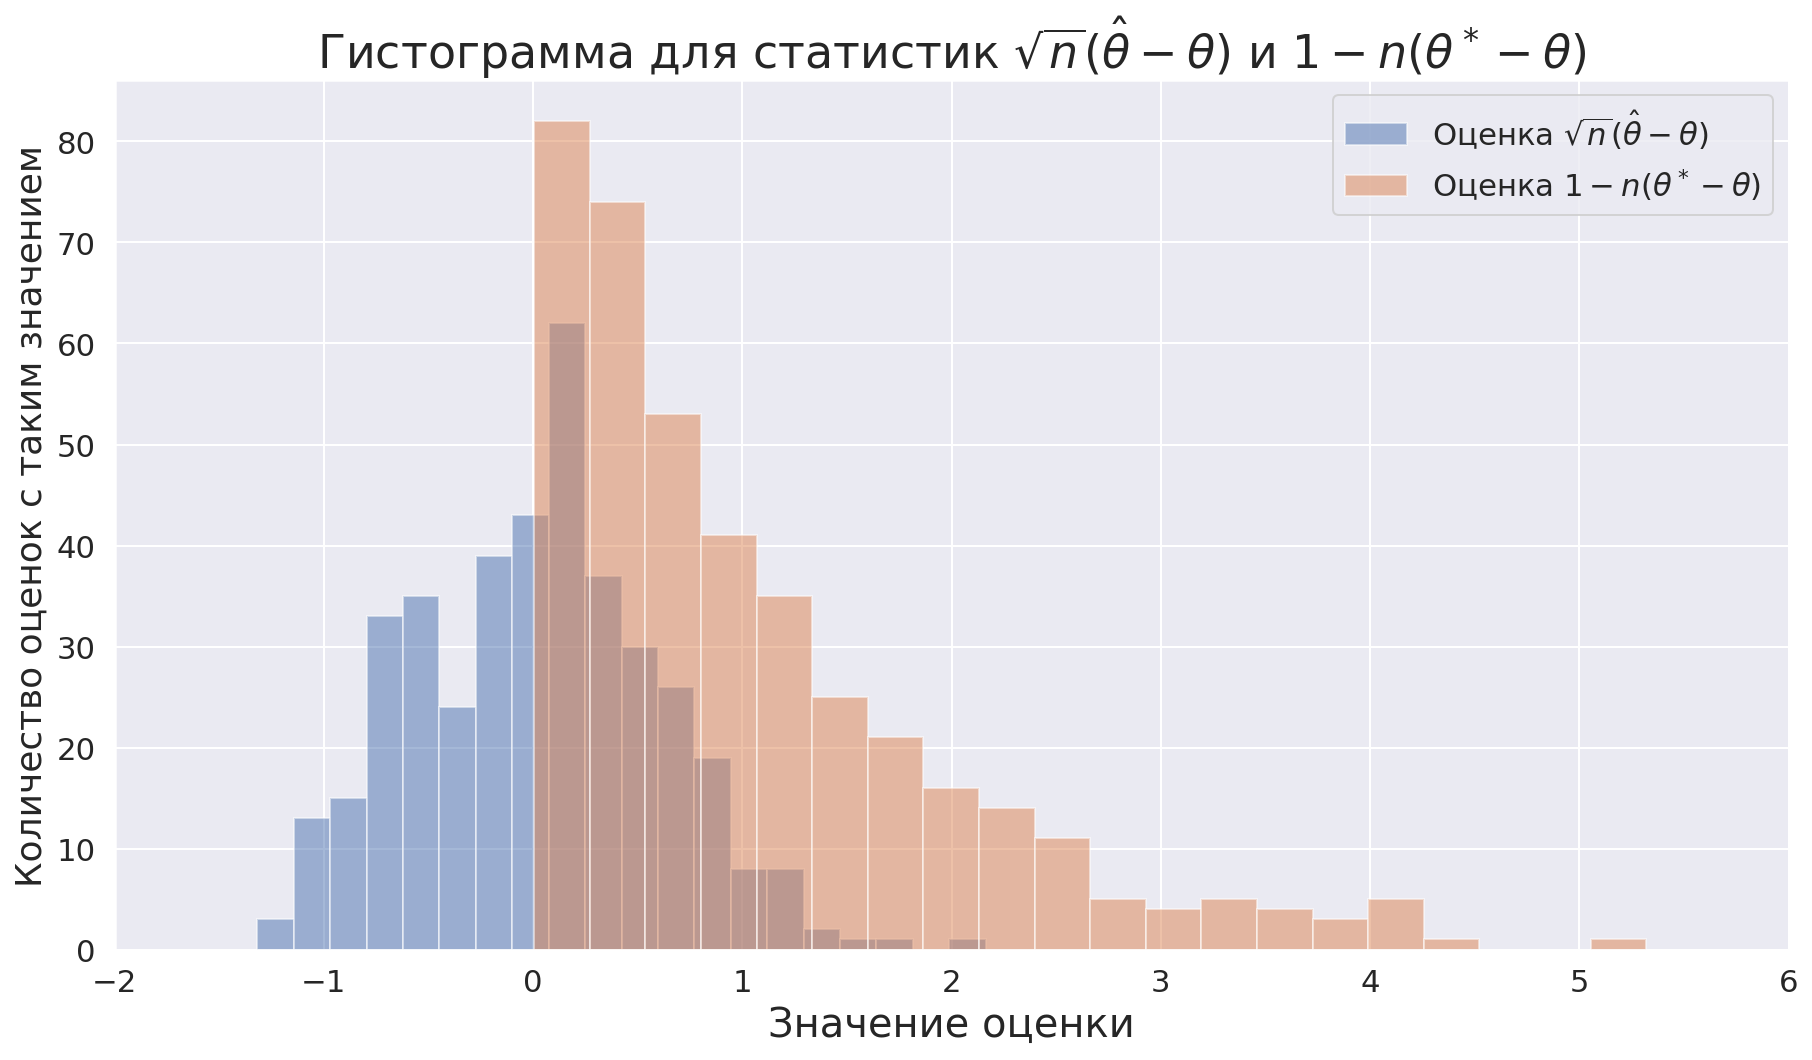

In [ ]:
draw_two_estims_hist(
    stats_vectors,
    id_to_estimation_name = {
      0: r'$\sqrt{n} (\hat\theta - \theta)$',
      1: r'$1 - n  (\theta^* - \theta)$',
    },
    title=r'Гистограмма для статистик $\sqrt{n} (\hat\theta - \theta)$ и '+ 
          r'$1 - n  (\theta^* - \theta)$',
    x_min=-2,
    x_max=6,
    )

На какие распределения похожи получившиеся гистограммы?

**Ответ:** Гистограмма для стастики $1 - n  (\theta^* - \theta)$ похожа на экспоненциальное распределение, а гистограмма для $\sqrt{n} (\hat\theta - \theta)$ похожа на нормальное распределение.

Вспомните чему равен коэффициент $\sigma(\theta)$ для асимптотиически нормальной оценки $\hat\theta = 2\overline{X}$ для параметра $\theta$ равномерного распределения в формуле 
$$
\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{\sigma^2(\theta)}} \xrightarrow{d} N(0, 1)
$$.

**Ответ**: По Центральной предельной теореме для с.в. $2X_1, \dots, 2X_n$ можно получить, что $\sigma^2(\theta) = D(2X_1) = 4DX_1 = 4 \frac{\theta^2}{12} = \theta^2/3$.

Посчитайте значения статистики
$$\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{\sigma^2(\theta)}}$$
для каждой выборки. Передайте получившиеся значения в переменную `theta_norm`. И запустите ячейку снизу.

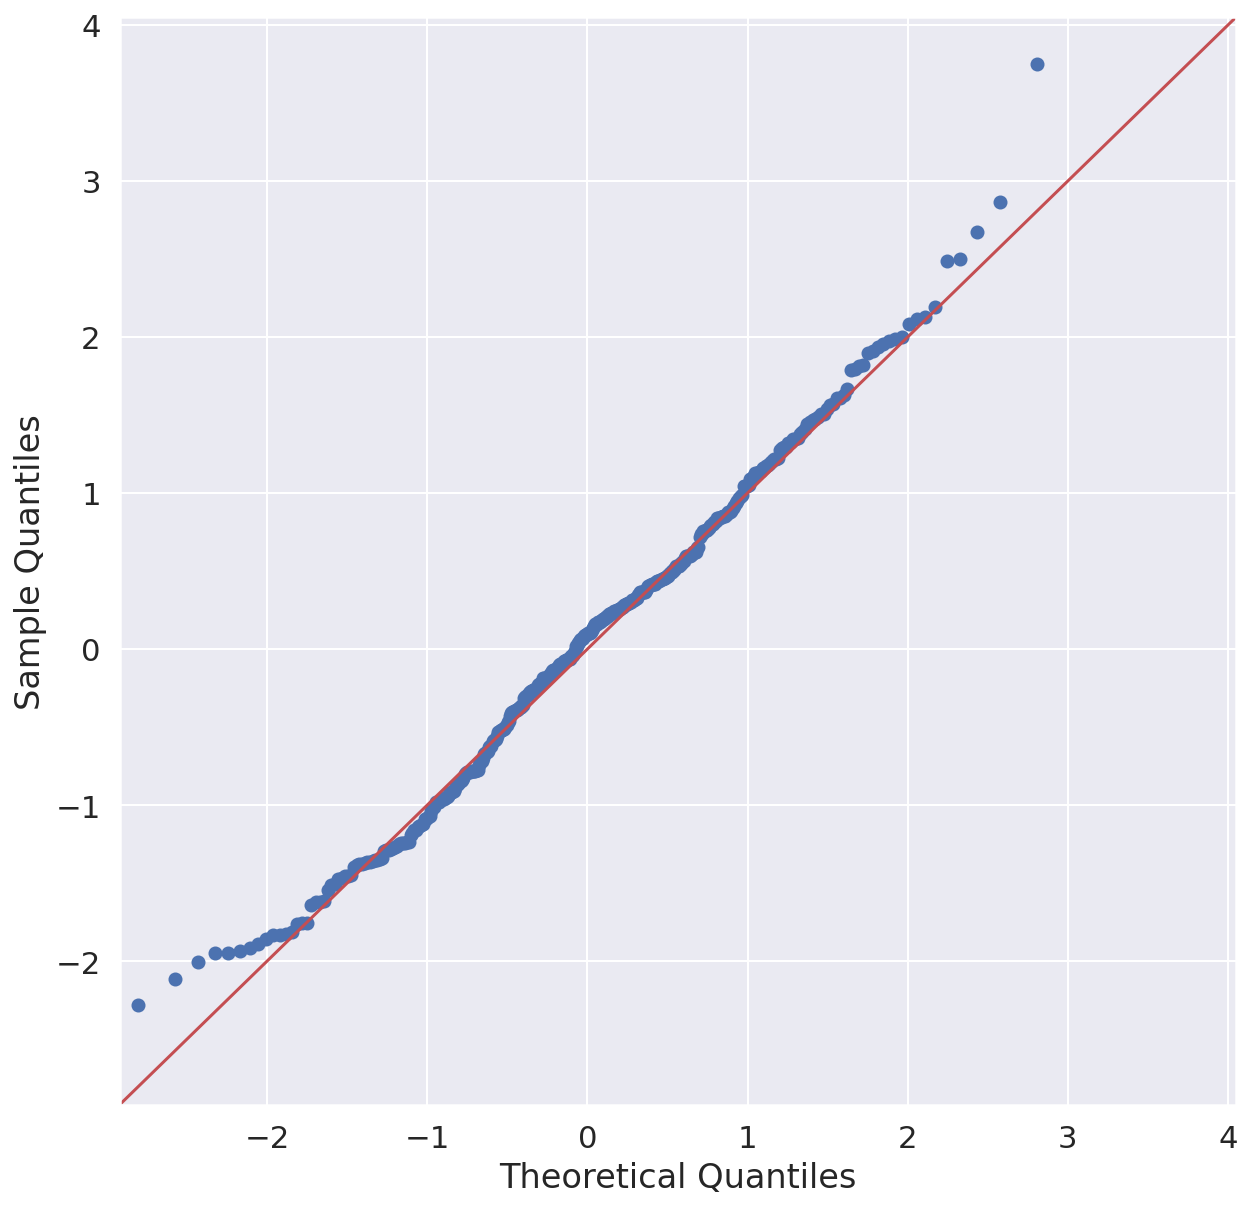

In [ ]:
import statsmodels.api as sm


theta_norm = stat_1 / np.sqrt(THETA ** 2 / 3)
fig, ax = plt.subplots(figsize=(10, 10))
sm.qqplot(theta_norm, line='45', ax=ax)
fig.show()

Для быстрой проверки гипотезы о том, что выборка принадлежит какому-либо распределению часто используется инструмент под названием `QQ-plot` (первые буквы означают `Quantile`). На нем по оси $x$ отложены теоретические значения квантиля, а по оси $y$ -- квантили тестируемой выборки. Очевидно, в идеале такие квантили должны совпадать, поэтому на графике можно увидеть красную линию соответствующую графику функции $y = x$.

Сделайте вывод по графику выше. Можно ли утверждать, что выборка взята из нормального распределения?

**Ответ:** Как видно квантили тестируемой выборки очень близки к теоретическим, а значит действительно можно утверждать, что выборка была взята из нормального распределения.

Вернемся к статистике $1 - n  (\theta^* - \theta)$. Еще раз взгляните на гистограмму, соотвутствующую этой статистике. Попробуйте построить `QQ-plot` для различных распределений (например можно передать в параметр `dist=sps.uniform` в функцию `sm.qqplot` или любое другое из модуля `scipy.stats`). Какое распределение подходит лучше всего?

**Ответ:** Как видим экспоненциальное распределение подходит лучше всего.

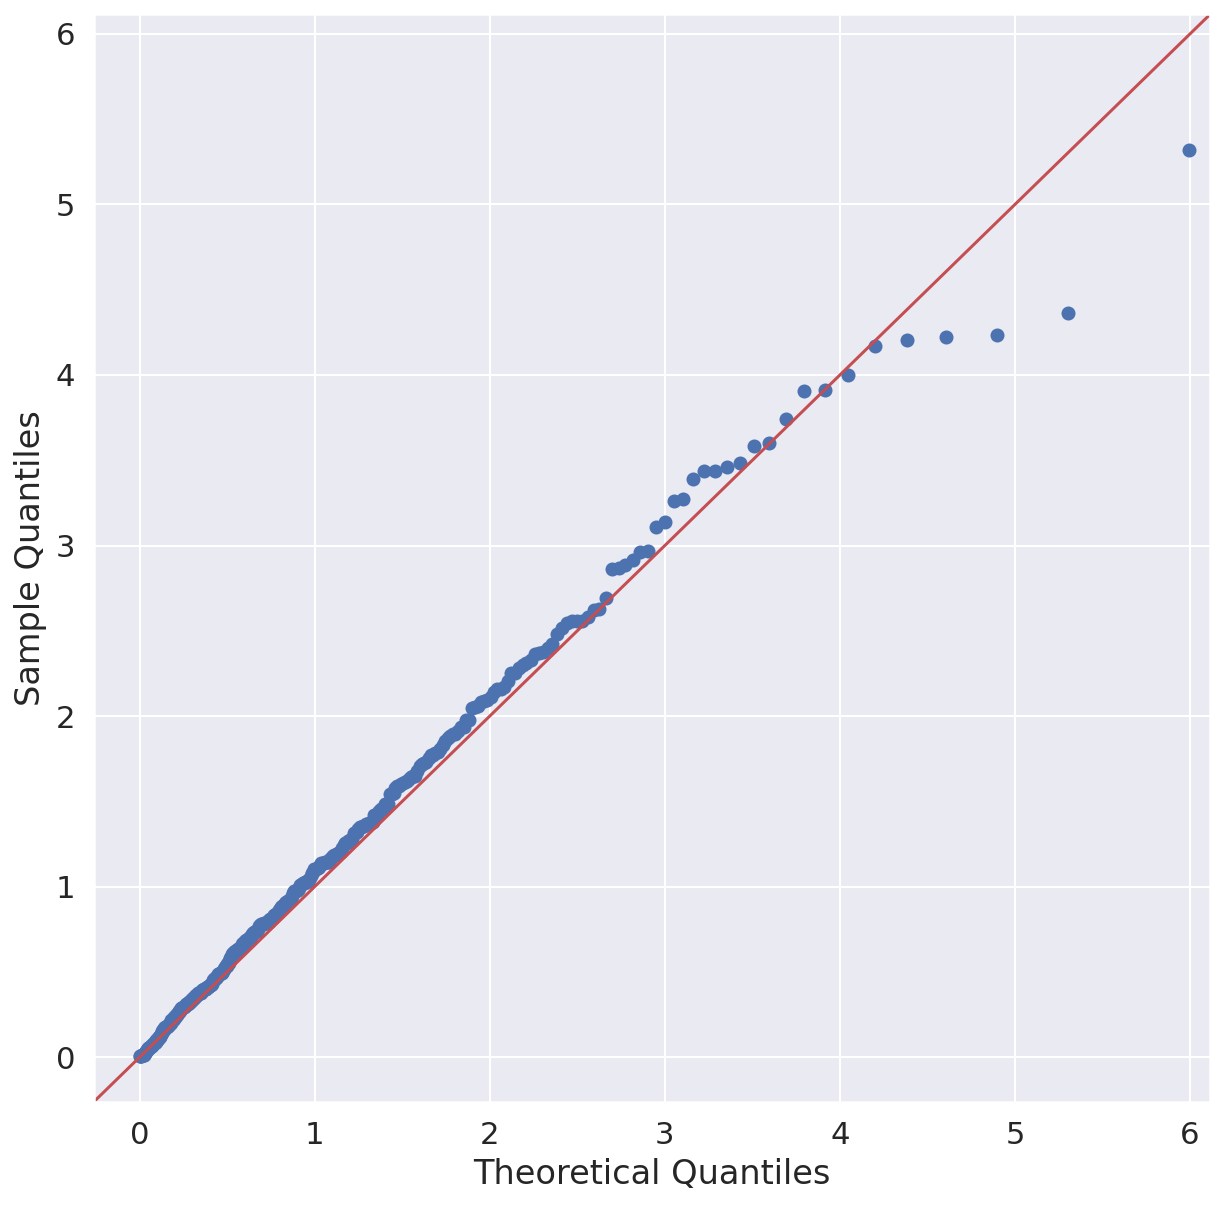

In [ ]:
theta_exp = stat_2
fig, ax = plt.subplots(figsize=(10, 10))
sm.qqplot(theta_exp, line='45', ax=ax, dist=sps.expon)
fig.show()

Плохо ли, что оценка $\theta^*$ не асимптотически нормальна? Сделайте вывод о скорости сходимости оценок. Какая из них «выгоднее»?

**Ответ:** Скорость сходимости ниже у оценки  $\sqrt{n} (\hat\theta - \theta)$, потому что расстояние между оценкой и параметром ведет себя как функция $\frac{1}{\sqrt{n}}$ , а в случае с оценкой $1 - n  (\theta^* - \theta)$ скорость сходимости "выше", потому что расстояние между $\theta^*$ и $\theta$ ведет себя уже как как $\frac{1}{n}$, что гораздо больше при больших `n`, именно поэтому не плохо что оценка $\theta^*$ не асимптотически нормальна.

## Важно

**Перед отправкой нажмите `Restart and run all`**. Проверьте, что все работает без ошибок.